In [1]:
from mplsoccer import Pitch,VerticalPitch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
seta = 0
if(seta==0):
    data = pd.read_csv('firsthalf.csv')
else:
    data = pd.read_csv('secoundhalf.csv')

In [3]:
data = data.replace("-",float(0))

In [4]:
data.Event.unique()

array(['Pass', 'Passfail', 'intercept', 'clear', 'go', 'Cross',
       'ShotOnTarget', 'ShotOffTarget', 'fail', 'getfoul', 'foul',
       'ShotBlock', 'block', 'yellow', 'Assist', 'ShotGetGoal', 'Opgoal'],
      dtype=object)

In [5]:
if(seta==0):
    data['X'] = data['X']*1.2
    data['Y'] = data['Y']*.8
    data['X2'] =data['X2']*1.2
    data['Y2'] = data['Y2']*.8
else:
    data['X'] = 120-data['X']*1.2
    data['Y'] = 80-data['Y']*.8
    data['X2'] = 120-data['X2']*1.2
    data['Y2'] = 80-data['Y2']*.8

In [6]:
data

Team    Player      Event  Mins  Secs     X     Y     X2    Y2
0    Home  Siwakorn       Pass     0     0  33.6  68.8   24.0  73.6
1    Home     Wasan   Passfail     0     0  22.8  73.6   33.6  76.8
2    Home  Phitiwat  intercept     0     0  18.0  67.2    0.0   0.0
3    Home   Brinner      clear     0     0  19.2  51.2    0.0   0.0
4    Home      Kato  intercept     0     0  43.2  74.4    0.0   0.0
..    ...       ...        ...   ...   ...   ...   ...    ...   ...
292  Home   Brinner       Pass    45     0  37.2  55.2   78.0  44.8
293  Home    Felipe       Pass    45     0  76.8  48.8   92.4  60.8
294  Home      Kato       Pass    45     0  96.0  64.0  110.4  56.0
295  Home    Apirak  intercept    45     0   3.6  39.2    0.0   0.0
296  Home    Apirak     Opgoal    45     0   2.4  34.4    0.0   0.0

[297 rows x 9 columns]

In [7]:
if(seta==0):
    data15 = data[(data['Mins'] <= 15 ) ]
    data30 = data[(data['Mins'] <= 30) &(data['Mins'] > 15 ) ]
    data45 = data[(data['Mins'] <= 45 ) &(data['Mins'] > 30 )]
else:
    data15 = data[(data['Mins'] <= 60) &(data['Mins'] > 45 ) ]
    data30 = data[(data['Mins'] <= 75) &(data['Mins'] > 60 ) ]
    data45 = data[(data['Mins'] <= 90 ) &(data['Mins'] > 75 )]

In [8]:
data45

Team      Player      Event  Mins  Secs     X     Y     X2    Y2
197  Home  Shinnaphat     yellow    31     0  85.2  64.0    0.0   0.0
198  Home     Brinner      clear    32     0   4.8  11.2    0.0   0.0
199  Home      Apirak       Pass    32     0  10.8  36.8   26.4  49.6
200  Home    Phitiwat       Pass    32     0  39.6  48.8   54.0  54.4
201  Home        Kato       Pass    32     0  54.0  55.2   45.6  47.2
..    ...         ...        ...   ...   ...   ...   ...    ...   ...
292  Home     Brinner       Pass    45     0  37.2  55.2   78.0  44.8
293  Home      Felipe       Pass    45     0  76.8  48.8   92.4  60.8
294  Home        Kato       Pass    45     0  96.0  64.0  110.4  56.0
295  Home      Apirak  intercept    45     0   3.6  39.2    0.0   0.0
296  Home      Apirak     Opgoal    45     0   2.4  34.4    0.0   0.0

[100 rows x 9 columns]

In [9]:
dataShot = data[(data['Event'] == 'ShotOnTarget') |  (data['Event'] == 'ShotOffTarget') |
                         (data['Event'] == 'ShotGetGoal') | (data['Event'] == 'ShotBlock')]
dataShot= dataShot.reset_index()

In [10]:
dataShot

index  Team      Player          Event  Mins  Secs      X     Y   X2   Y2
0      16  Home   Getterson   ShotOnTarget     2     0  117.6  46.4  0.0  0.0
1      17  Home      Felipe  ShotOffTarget     2     0  104.4  54.4  0.0  0.0
2      45  Home     Brinner  ShotOffTarget     6     0  109.2  40.0  0.0  0.0
3      77  Home   Getterson   ShotOnTarget    12     0  111.6  43.2  0.0  0.0
4      78  Home  Shinnaphat      ShotBlock    13     0  116.4  32.8  0.0  0.0
5     160  Home      Felipe  ShotOffTarget    25     0   94.8  21.6  0.0  0.0
6     196  Home        Kato   ShotOnTarget    29     0  111.6  41.6  0.0  0.0
7     205  Home    Phitiwat   ShotOnTarget    32     0   85.2  32.0  0.0  0.0
8     212  Home     Brinner  ShotOffTarget    33     0  111.6  44.0  0.0  0.0
9     242  Home      Felipe    ShotGetGoal    38     0  114.0  26.4  0.0  0.0
10    245  Home      Felipe      ShotBlock    39     0  105.6  28.0  0.0  0.0

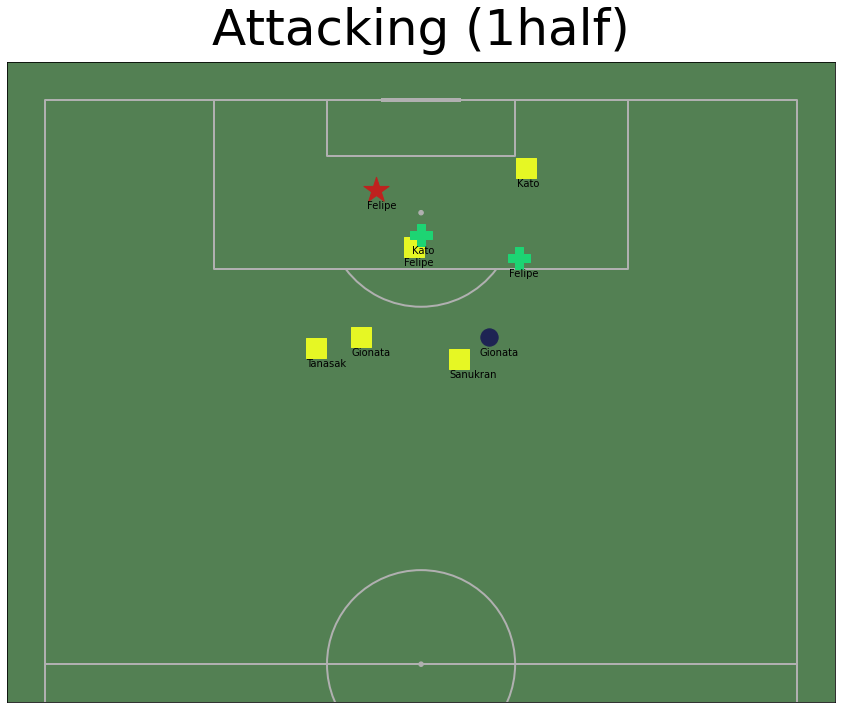

In [54]:
shX = dataShot['X']
shY = dataShot['Y']
shName = dataShot['Player']
shsty = dataShot['Event']

sout = dataShot[dataShot['Event'] == 'ShotOffTarget' ]
sot =  dataShot[dataShot['Event'] == 'ShotOnTarget' ]
sb =  dataShot[dataShot['Event'] == 'ShotBlock']
sgg =  dataShot[dataShot['Event'] == 'ShotGetGoal']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=True)
fig,ax =pitch.draw(figsize =(20,10))
    
#plt.scatter(dataShot['Y'],dataShot['X'],c='#BE2653',s = 700,marker = "*")
plt.scatter(sout['Y'],sout['X'],c='#E6F724',s = 400,marker = "s")
plt.scatter(sot['Y'],sot['X'],c='#1E2453',s = 300,marker = "o")
plt.scatter(sb['Y'],sb['X'],c='#1DD473',s = 500,marker = "P")
plt.scatter(sgg['Y'],sgg['X'],c='#BF211E',s = 700,marker = "*")

for i in range(len(dataShot['X'])):
    plt.text(shY[i]-1,shX[i]-2,shName[i])
title = fig.suptitle('Attacking (1half)',fontsize = 50)

In [12]:
dataPass = data[(data['Event'] == 'Pass') |  (data['Event'] == 'go') |
                         (data['Event'] == 'Passfail') | (data['Event'] == 'Cross')|  (data['Event'] == 'Assist')]
dataPass15 = data15[(data15['Event'] == 'Pass') |  (data15['Event'] == 'go') |
                         (data15['Event'] == 'Passfail') | (data15['Event'] == 'Cross')|  (data15['Event'] == 'Assist')]
dataPass30 = data30[(data30['Event'] == 'Pass') |  (data30['Event'] == 'go') |
                         (data30['Event'] == 'Passfail') | (data30['Event'] == 'Cross')|  (data30['Event'] == 'Assist')]
dataPass45 = data45[(data45['Event'] == 'Pass') |  (data45['Event'] == 'go') |
                         (data45['Event'] == 'Passfail') | (data45['Event'] == 'Cross')|  (data45['Event'] == 'Assist')]
dataPass = dataPass.reset_index()
dataPass15 = dataPass15.reset_index()
dataPass30 = dataPass30.reset_index()
dataPass45 = dataPass45.reset_index()

In [13]:
dataPass

index  Team      Player     Event  Mins  Secs     X     Y     X2    Y2
0        0  Home    Siwakorn      Pass     0     0  33.6  68.8   24.0  73.6
1        1  Home       Wasan  Passfail     0     0  22.8  73.6   33.6  76.8
2        5  Home  Shinnaphat      Pass     1     0  36.0  58.4   64.8  51.2
3        6  Home    Phitiwat  Passfail     1     0  64.8  49.6   72.0  54.4
4        8  Home    Sanukran      Pass     1     0  69.6  20.0   81.6  12.0
..     ...   ...         ...       ...   ...   ...   ...   ...    ...   ...
203    290  Home    Sanukran      Pass    45     0  64.8   7.2   50.4  10.4
204    291  Home     Sarawut  Passfail    45     0  45.6  12.8   88.8  66.4
205    292  Home     Brinner      Pass    45     0  37.2  55.2   78.0  44.8
206    293  Home      Felipe      Pass    45     0  76.8  48.8   92.4  60.8
207    294  Home        Kato      Pass    45     0  96.0  64.0  110.4  56.0

[208 rows x 10 columns]

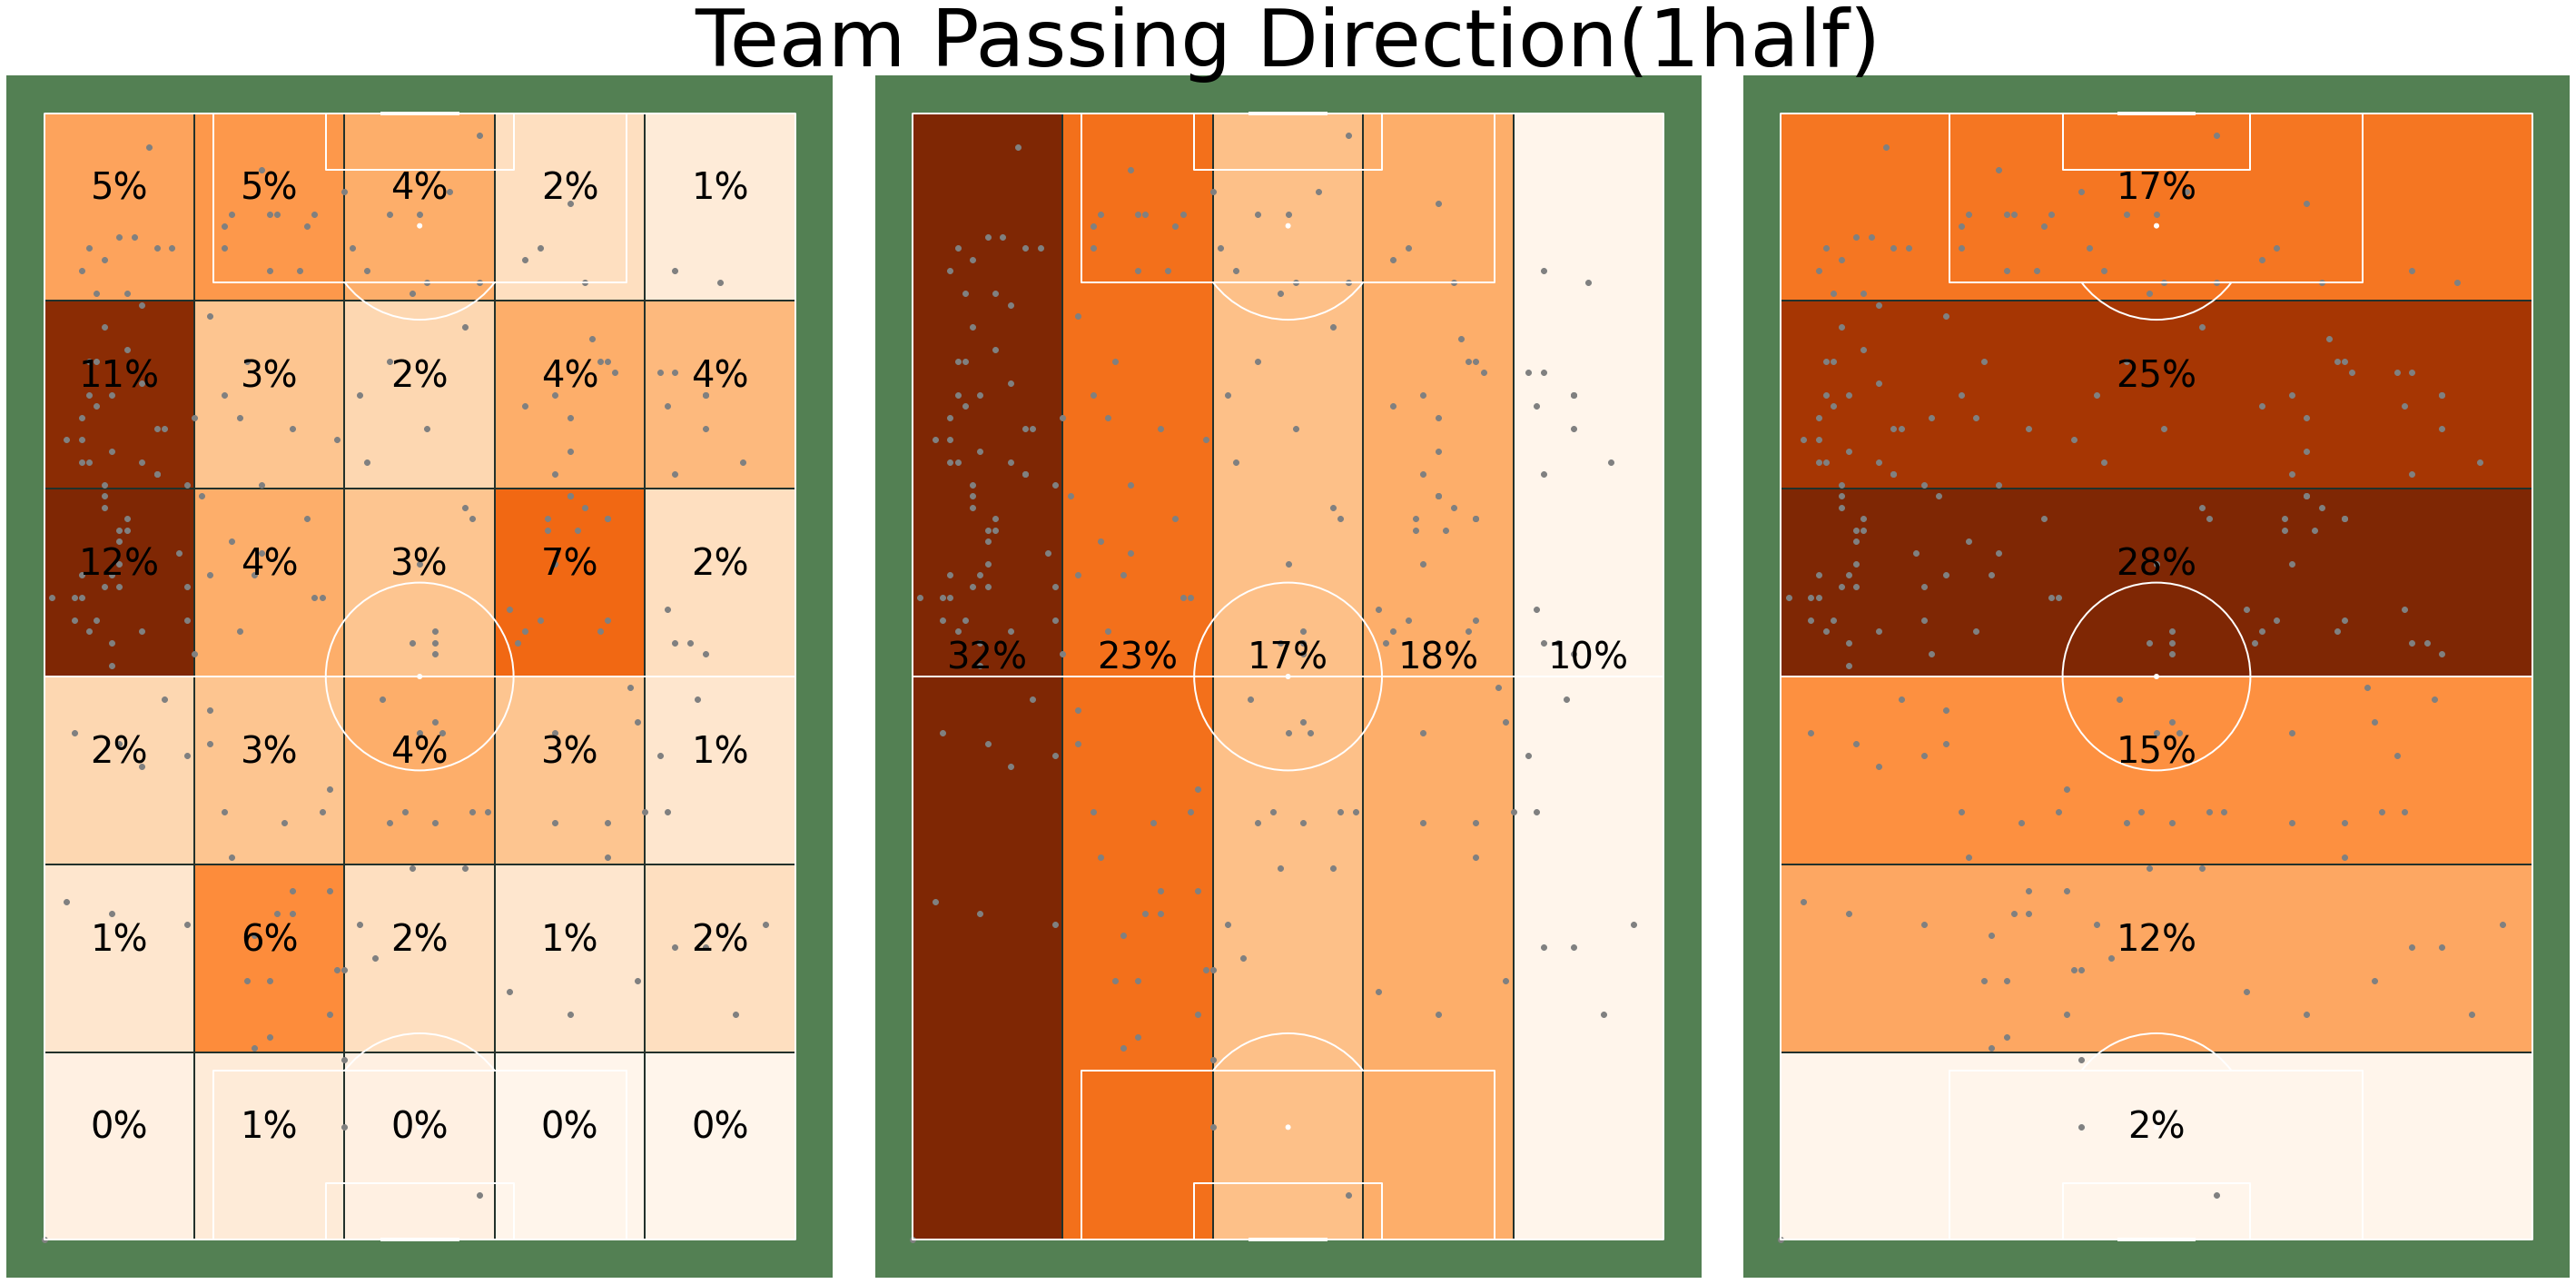

In [14]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass['X2'],dataPass['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass['X2'],dataPass['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(1half)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(2half)',fontsize = 88)


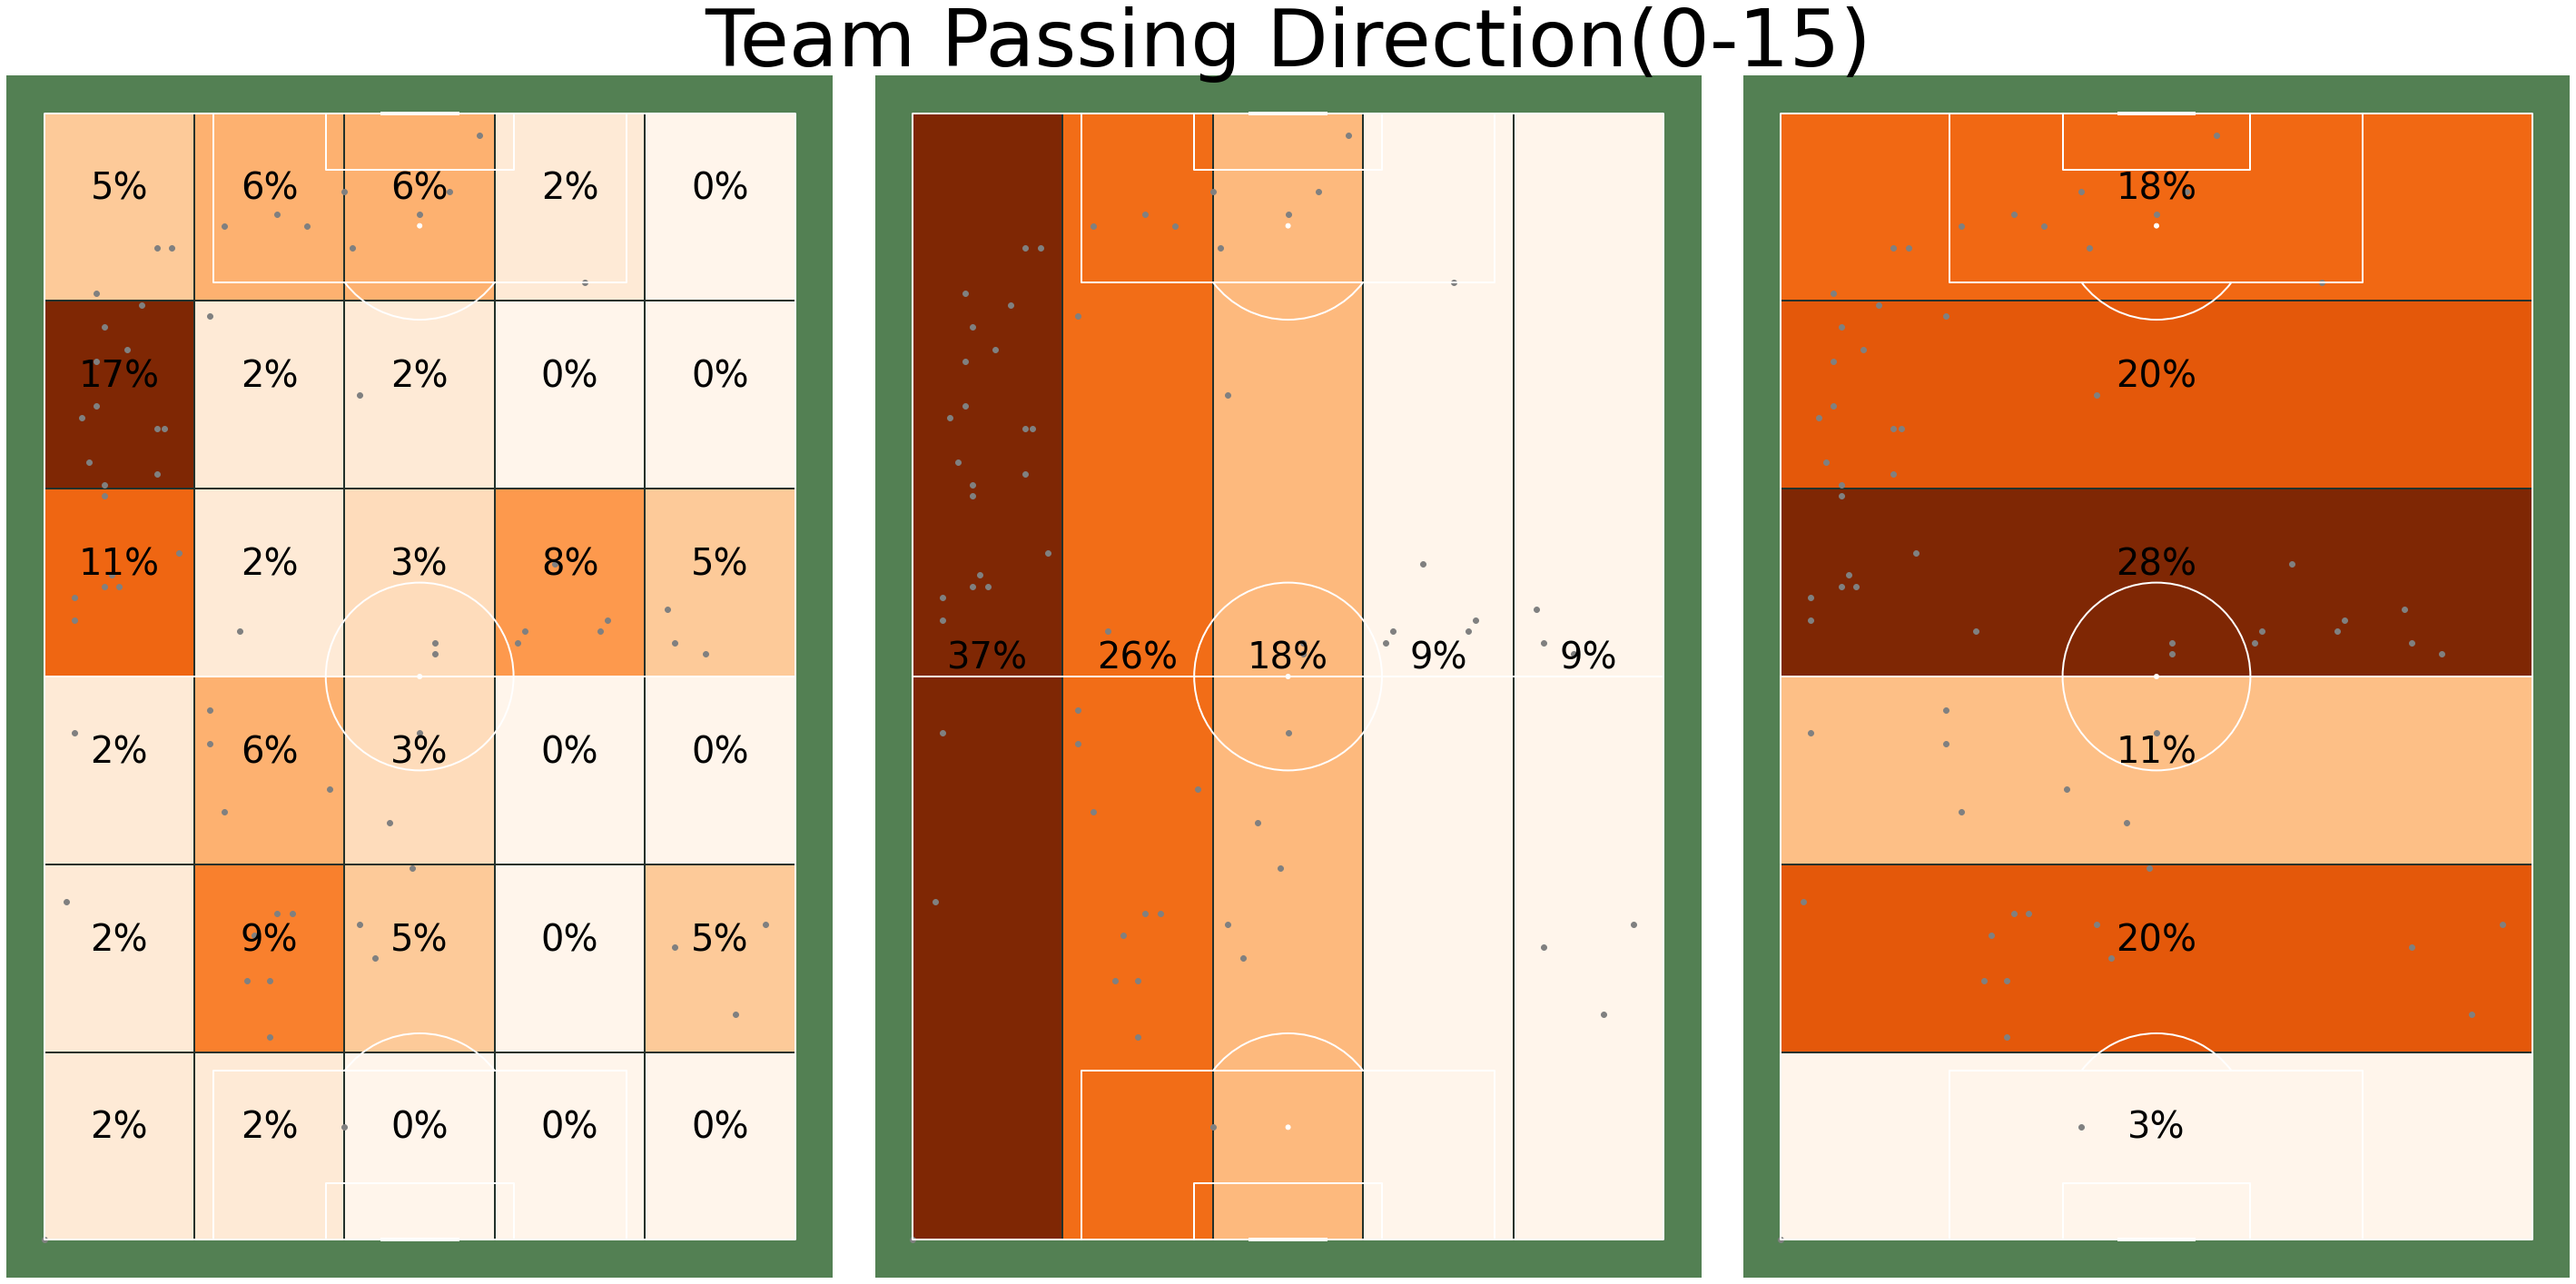

In [15]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass15['X2'],dataPass15['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass15['X2'],dataPass15['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(0-15)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(45-60)',fontsize = 88)

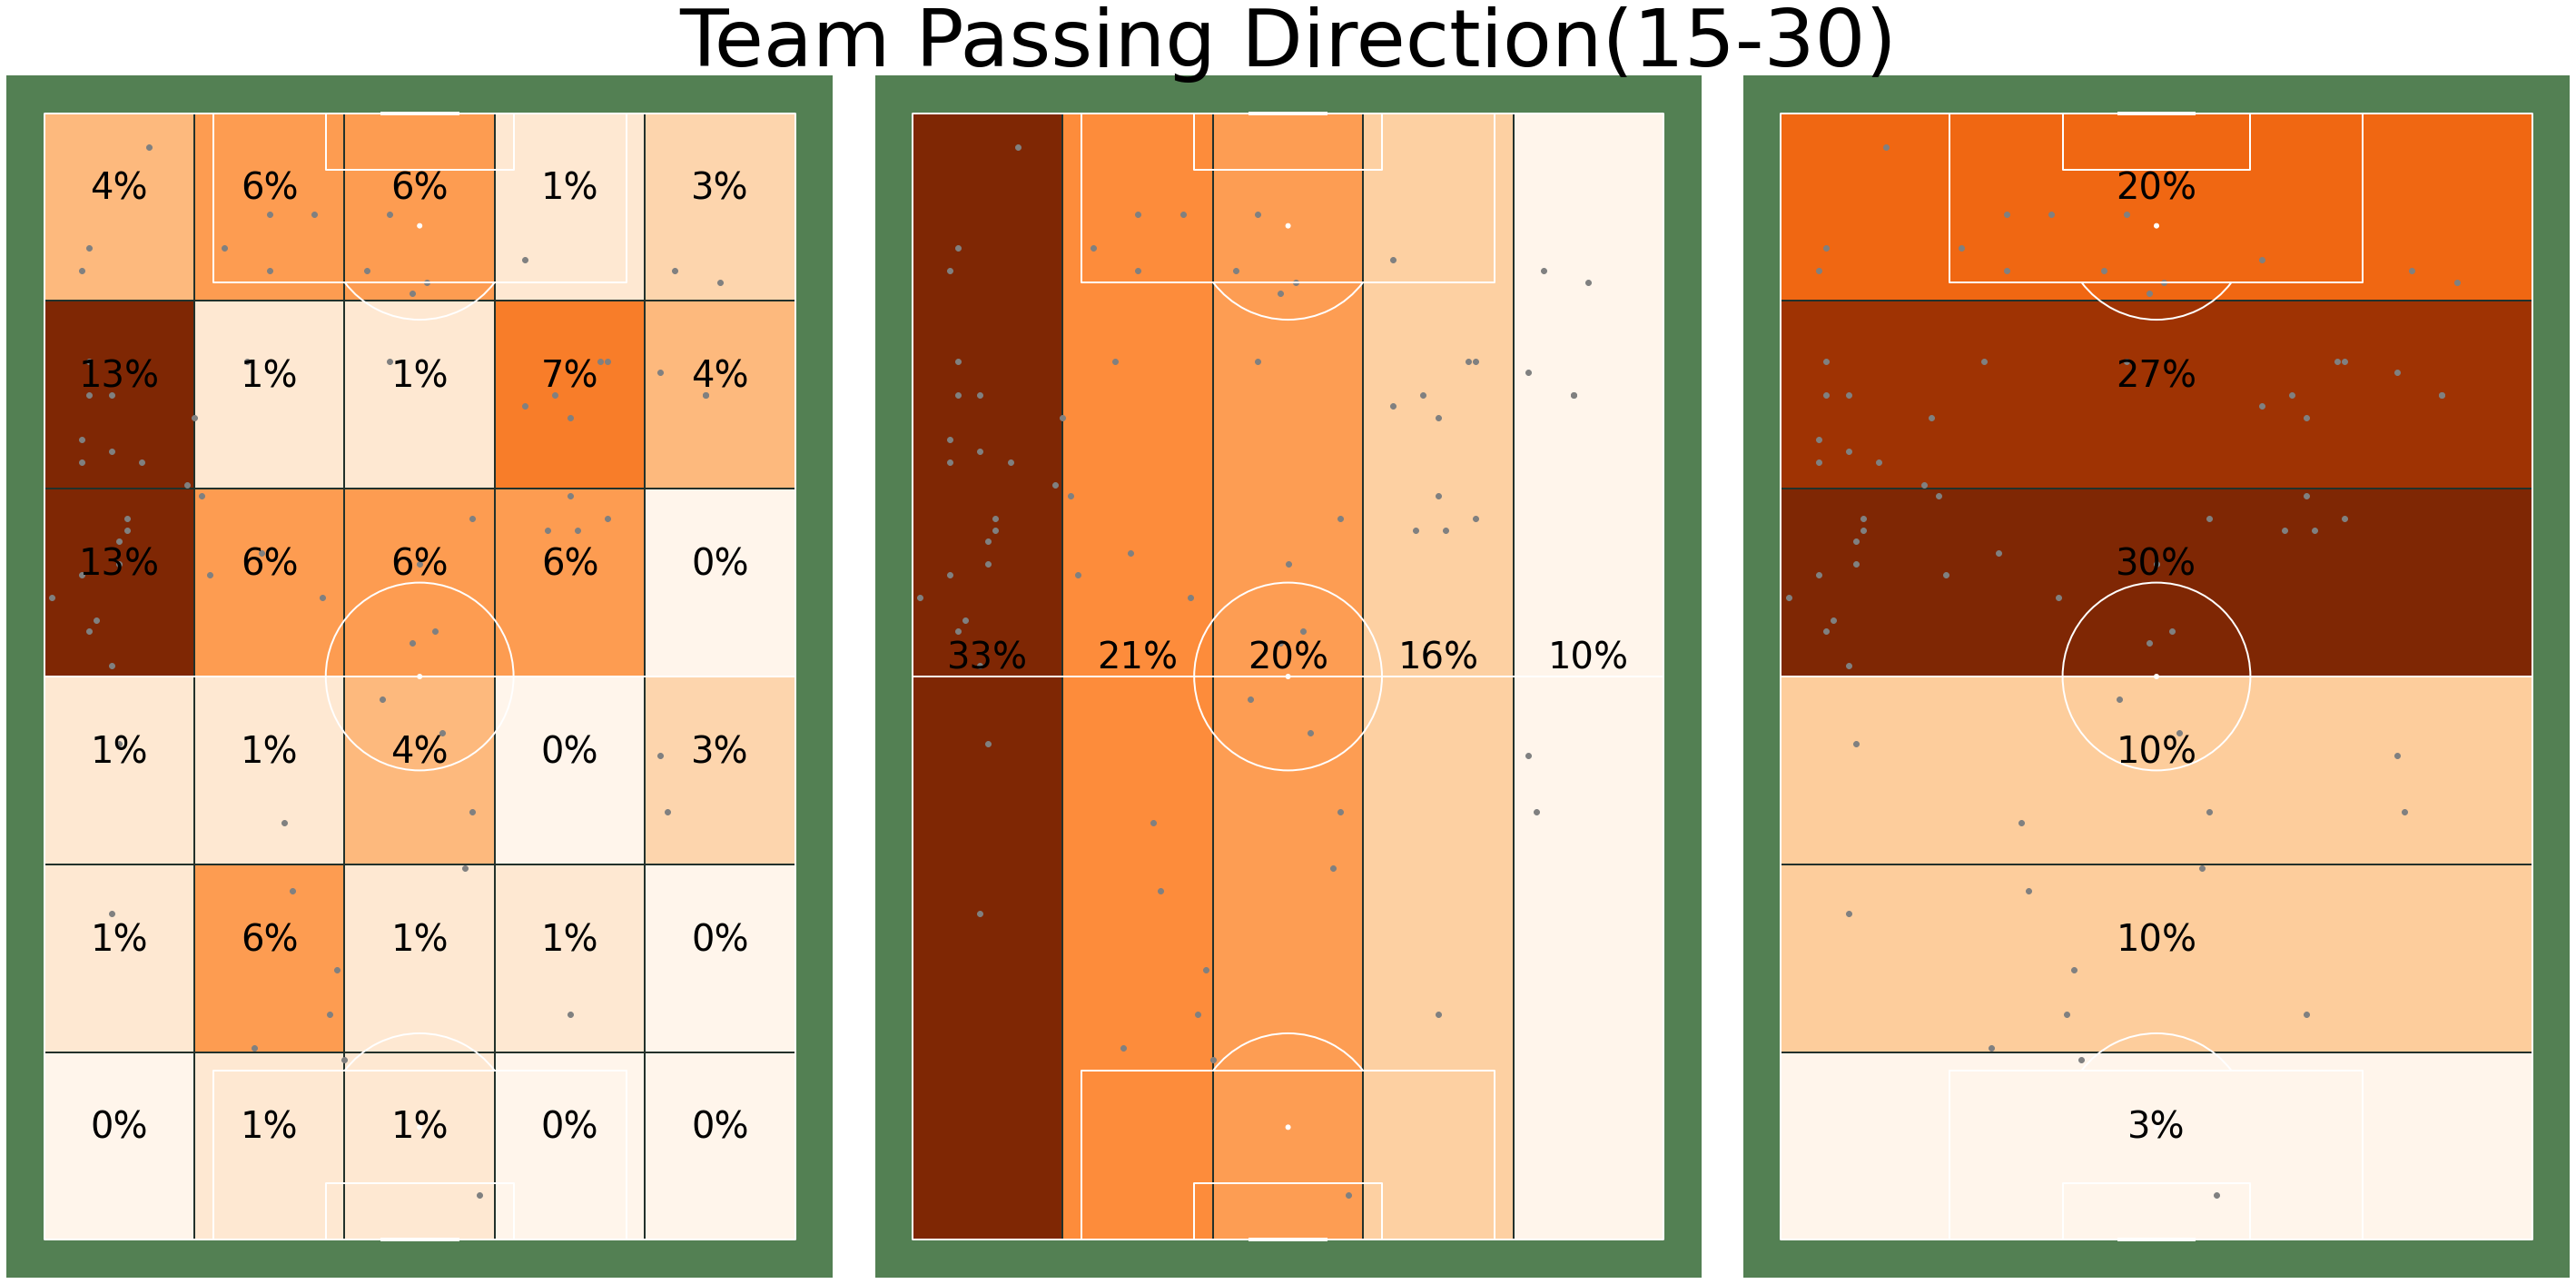

In [16]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass30['X2'],dataPass30['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass30['X2'],dataPass30['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(15-30)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(60-75)',fontsize = 88)

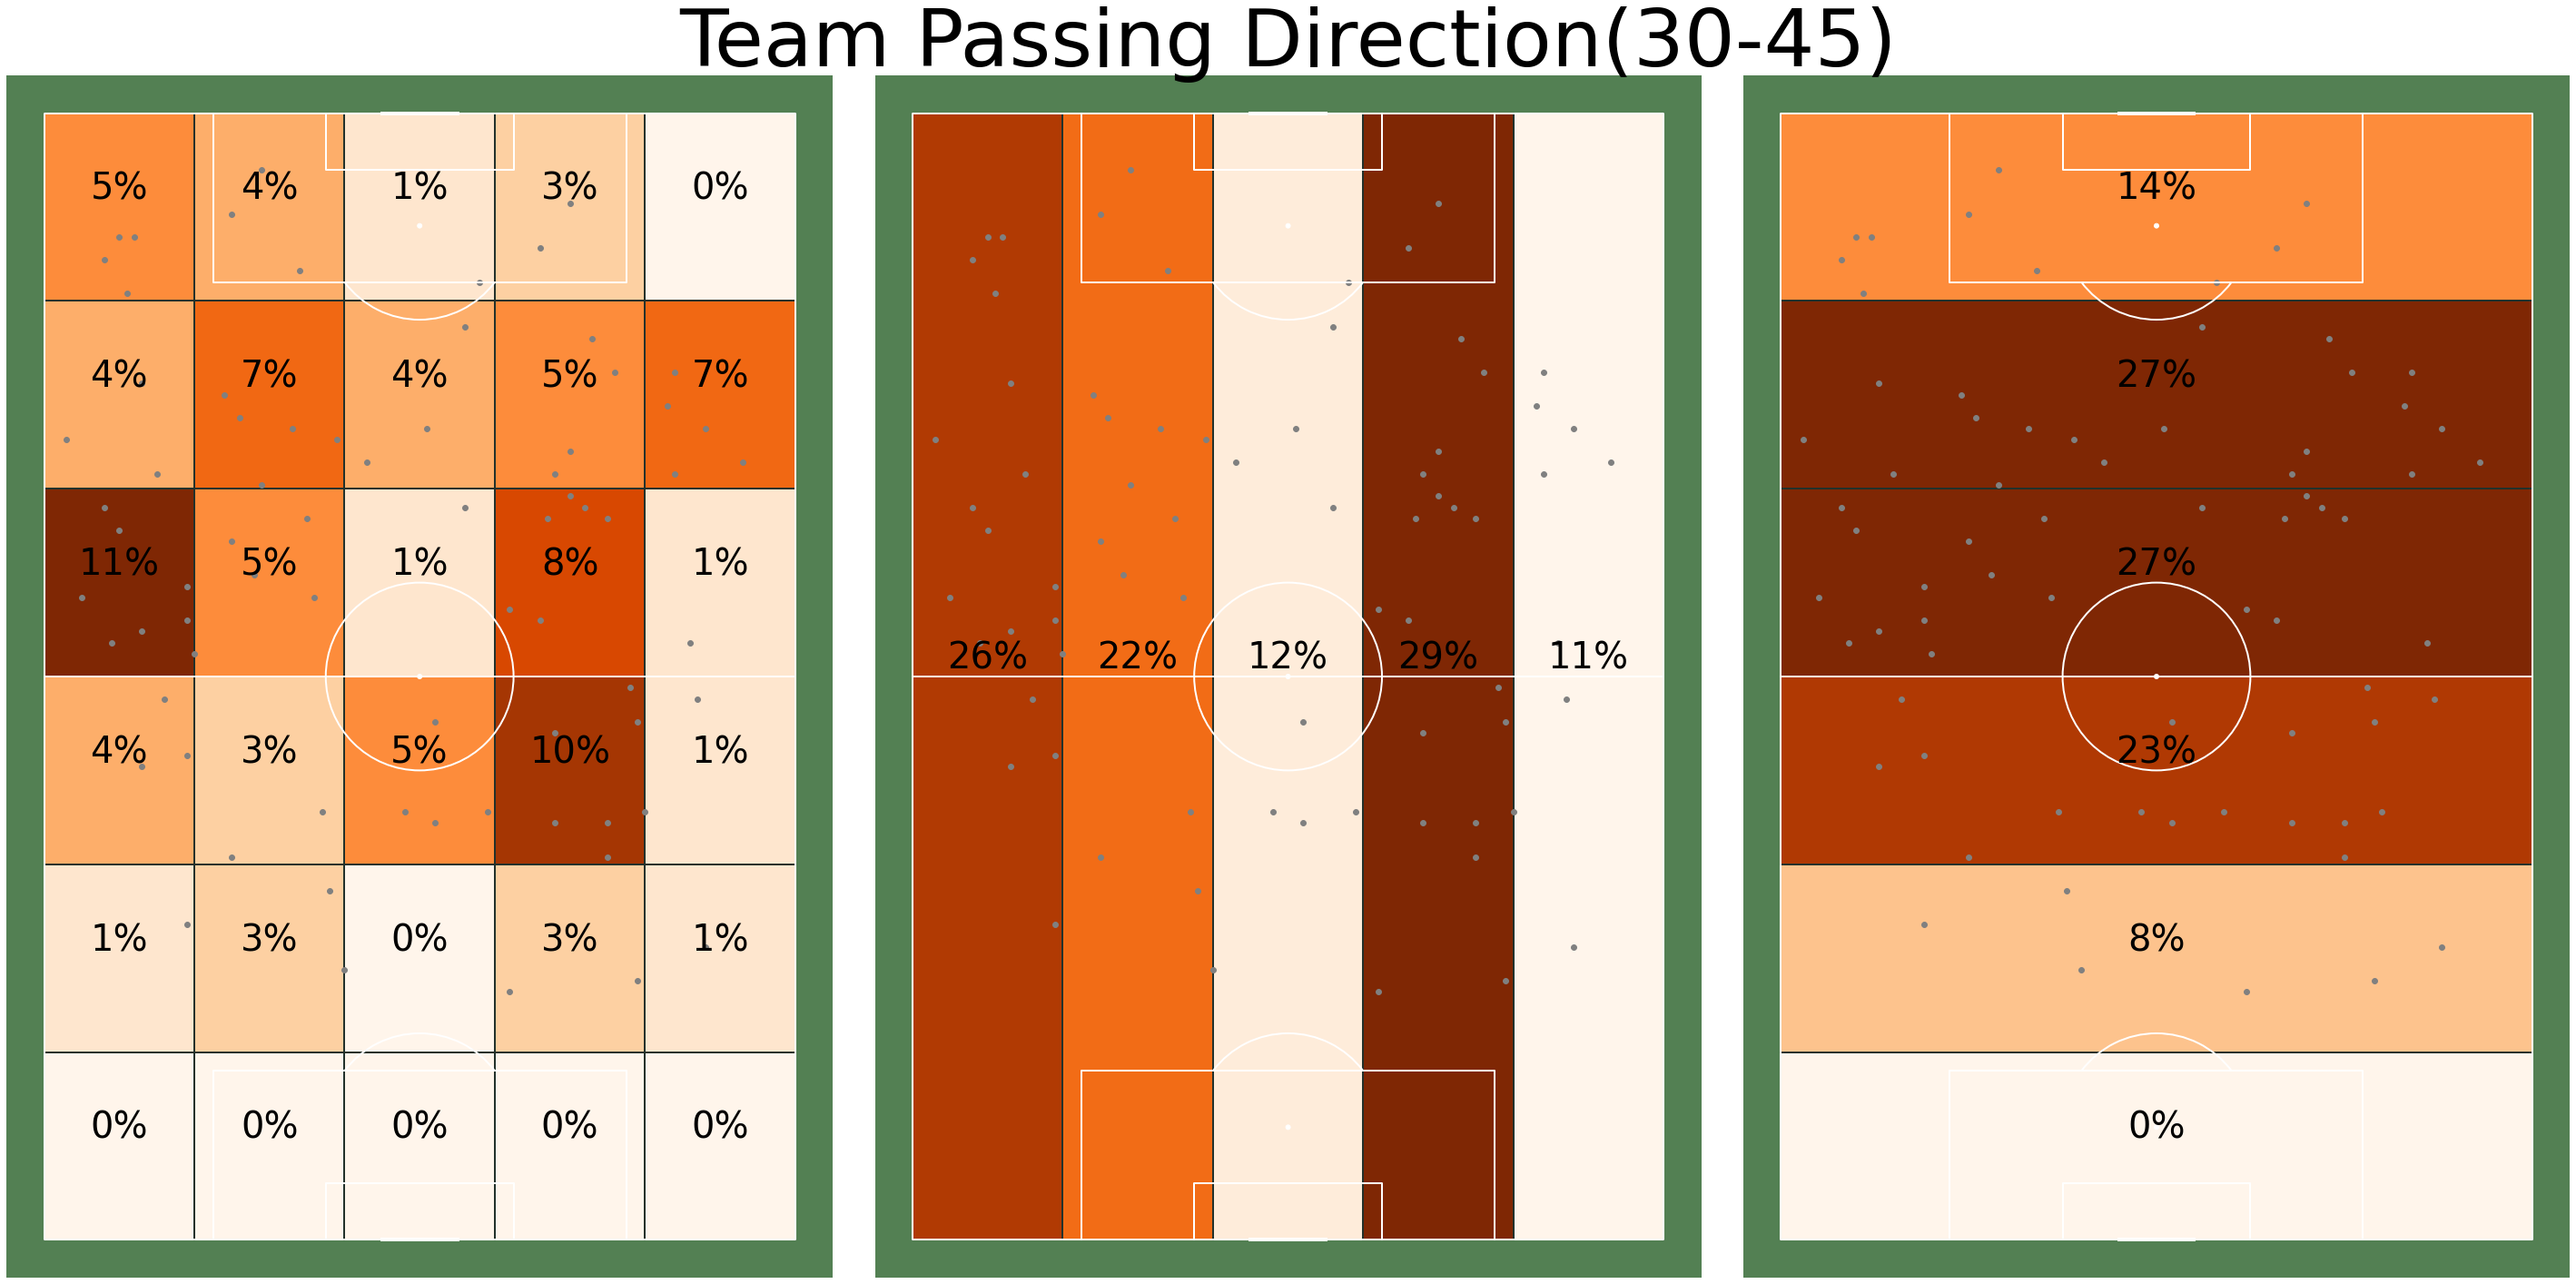

In [17]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass45['X2'],dataPass45['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass45['X2'],dataPass45['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(30-45)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(75-90)',fontsize = 88)

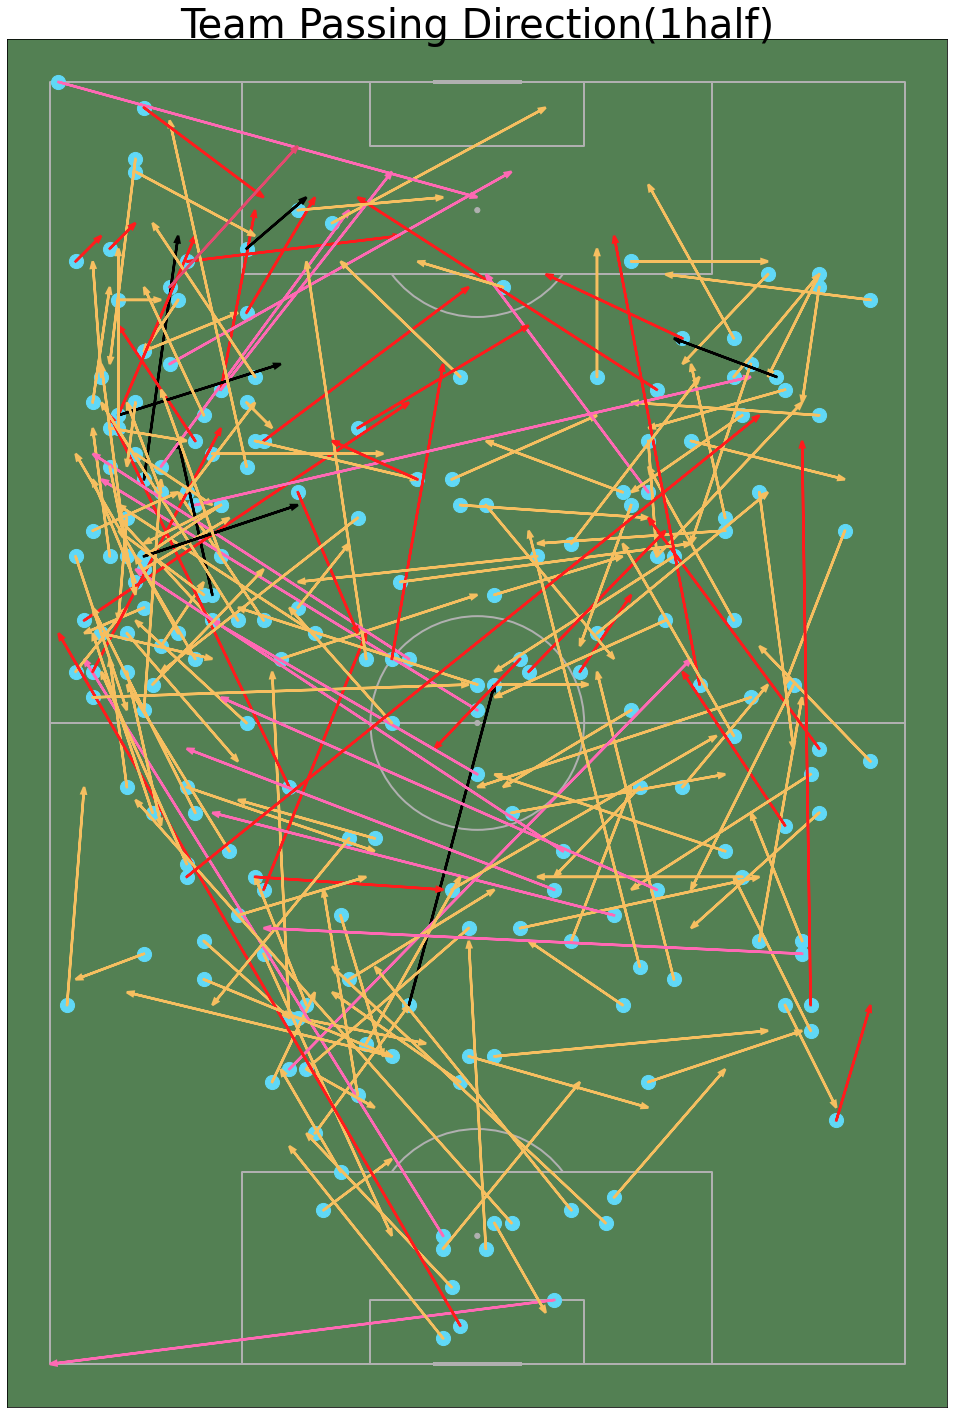

In [18]:

pDrtxH = dataPass['X']
pDrtyH = dataPass['Y']
pDesxH = dataPass['X2']
pDesyH = dataPass['Y2']
pStyH = dataPass['Event']

B = 0
F = 0
f = 0
for j in range(len(pStyH)):
    if(pDrtxH[j] > pDesxH[j]):
        B+= 1
    if(pDrtxH[j] < pDesxH[j]):
        F += 1
for j in range(len(pStyH)):
    if(pStyH[j] == 'Passfail'):
        f +=1
        
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')       
    
plt.scatter(dataPass['Y'],dataPass['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(1half)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(2half)',fontsize =40)

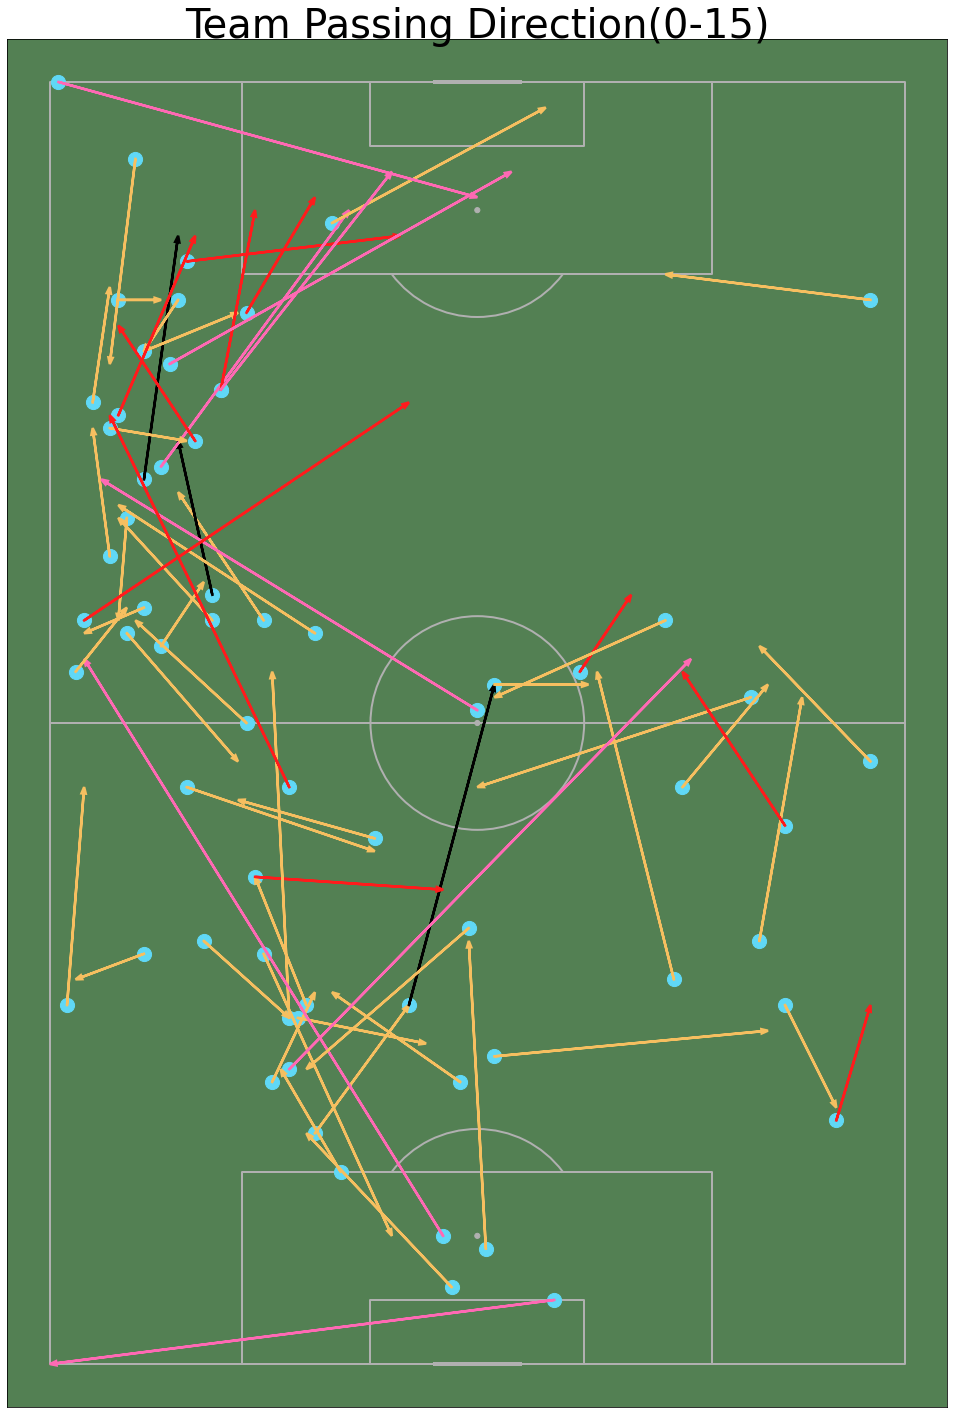

In [19]:
pDrtxH = dataPass15['X']
pDrtyH = dataPass15['Y']
pDesxH = dataPass15['X2']
pDesyH = dataPass15['Y2']
pStyH = dataPass15['Event']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')       
    
plt.scatter(dataPass15['Y'],dataPass15['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(0-15)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(45-60)',fontsize =40)

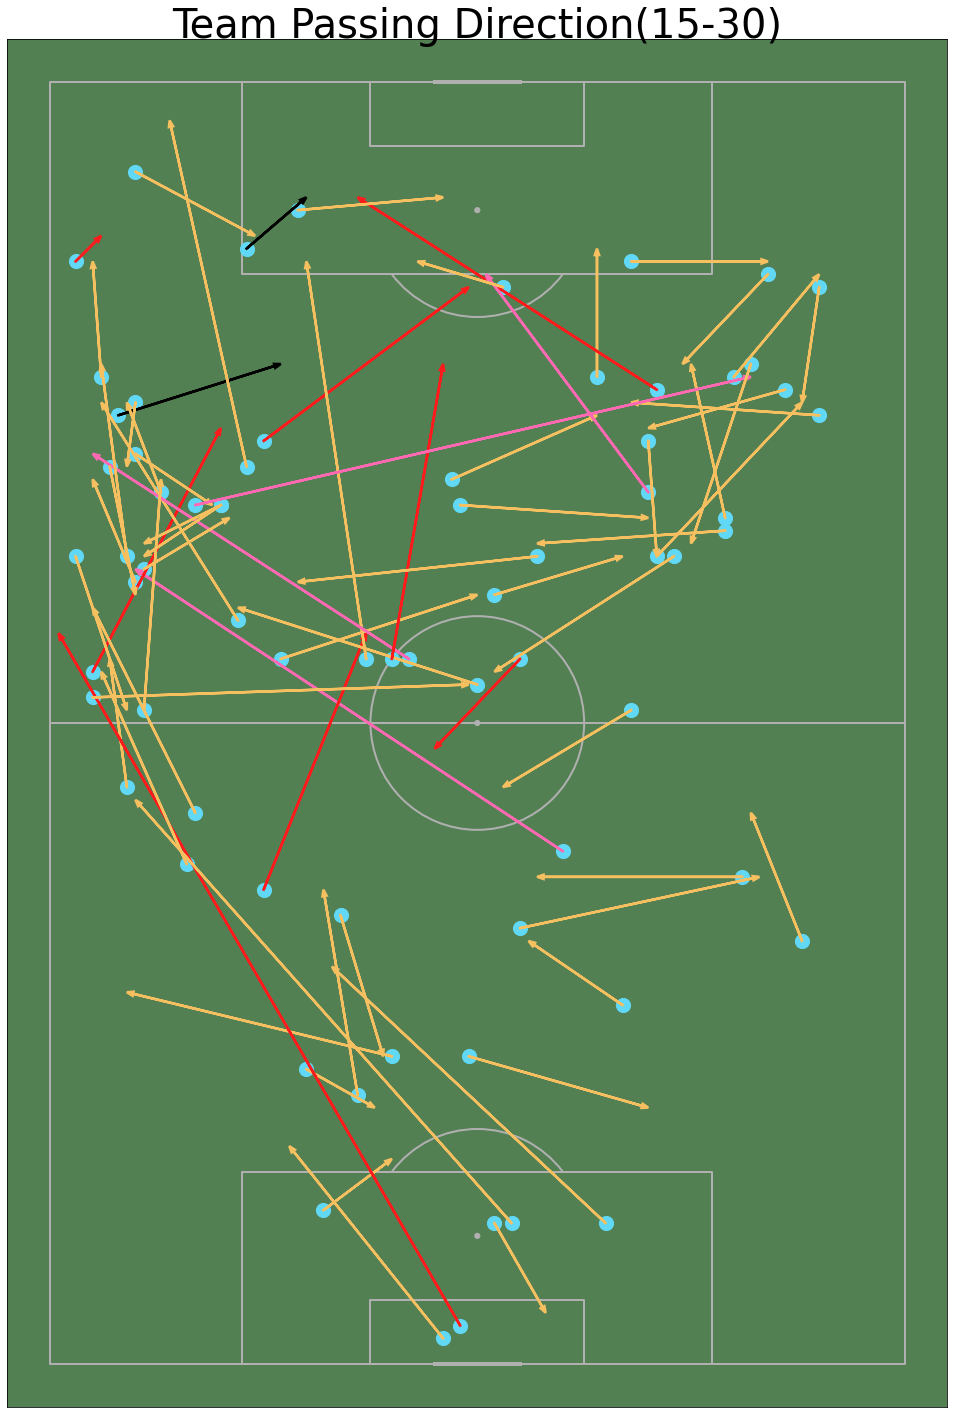

In [20]:
pDrtxH = dataPass30['X']
pDrtyH = dataPass30['Y']
pDesxH = dataPass30['X2']
pDesyH = dataPass30['Y2']
pStyH = dataPass30['Event']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')          
    
plt.scatter(dataPass30['Y'],dataPass30['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(15-30)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(60-75)',fontsize =40)

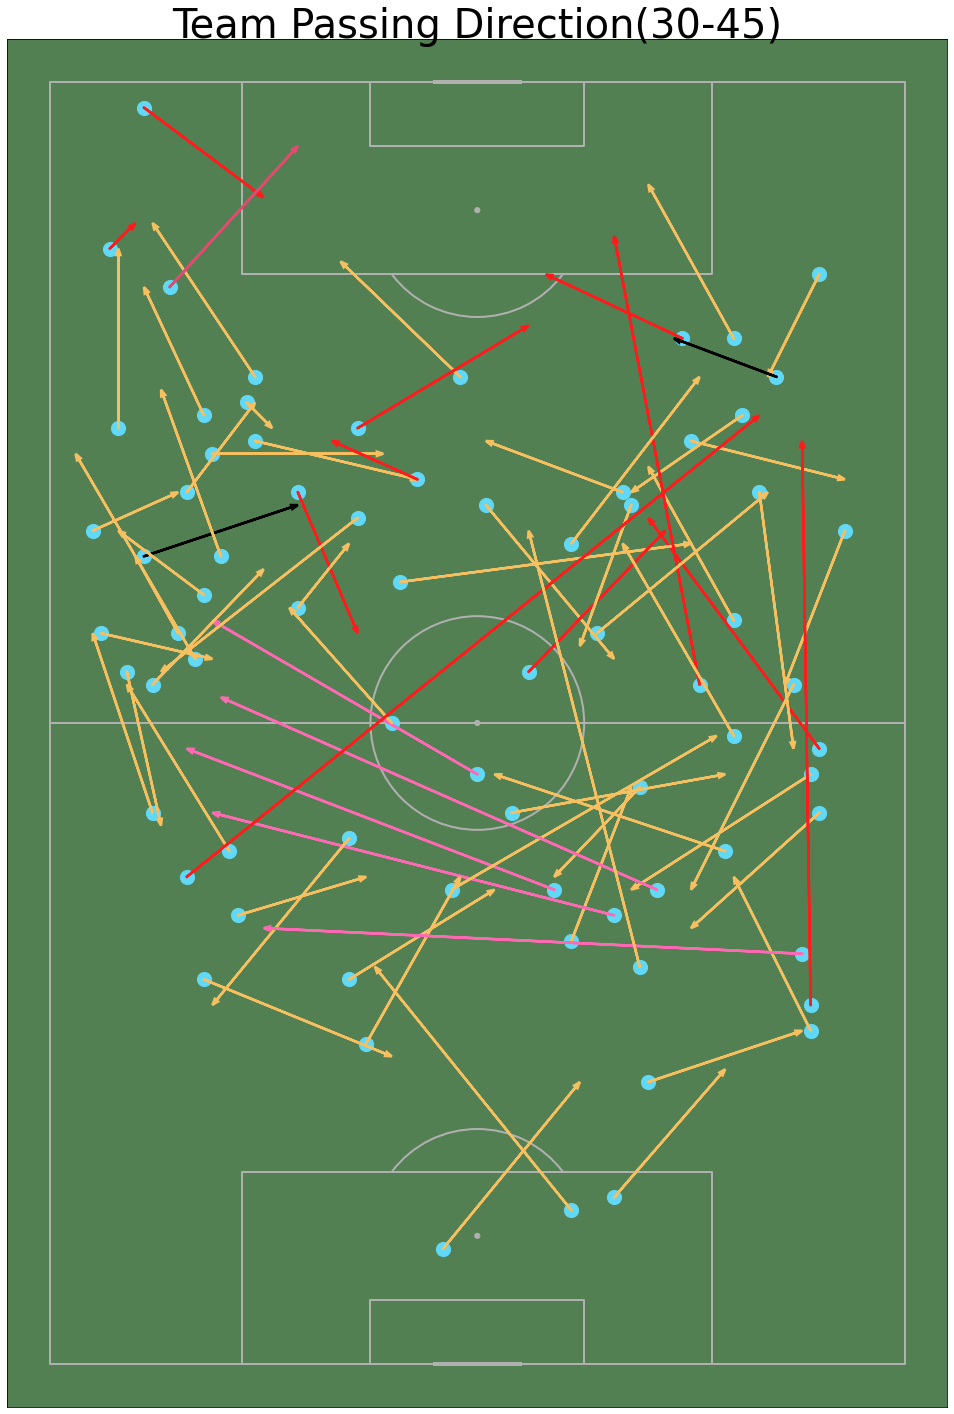

In [21]:
pDrtxH = dataPass45['X']
pDrtyH = dataPass45['Y']
pDesxH = dataPass45['X2']
pDesyH = dataPass45['Y2']
pStyH = dataPass45['Event']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')         
    
plt.scatter(dataPass45['Y'],dataPass45['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(30-45)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(75-90)',fontsize =40)

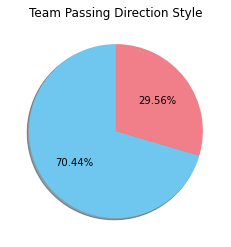

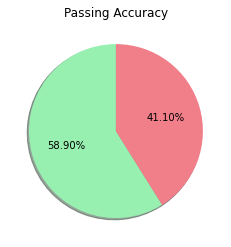

In [22]:
z = F,B
colors = ( "#6FC7F0" ,"#F07F8A")
plt.title("Team Passing Direction Style")
plt.pie(z ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors)
plt.show()
k = len(pStyH)-f,f
colors = ( "#97F0B0","#F07F8A")
plt.title("Passing Accuracy")
plt.pie(k ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors)
plt.show()

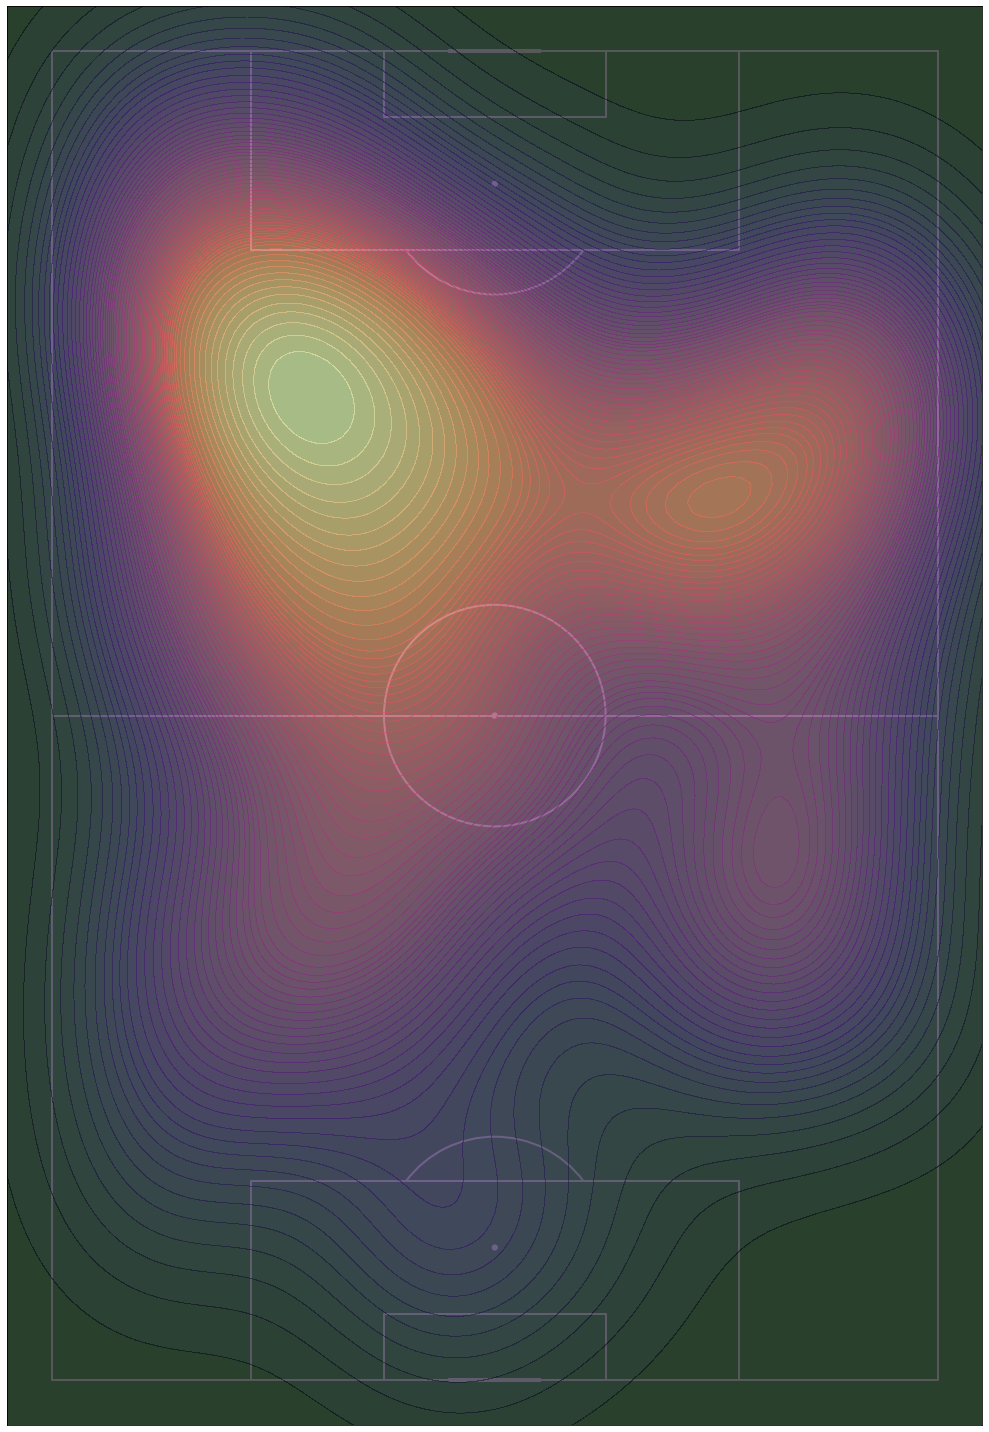

In [49]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053')
fig,ax =pitch.draw(figsize =(40,20))
#plt.scatter(dataPass['Y'],dataPass['X'],c='#60D8F6',s = 200 ,marker = 'o')
kde = sns.kdeplot(x = dataPass['Y'], y = dataPass['X'],
                  shade = True,shade_lowest=True,
                  alpha=.5,thresh=.4,n_levels=70,cmap = 'magma')

In [24]:
data.Player.unique()

array(['Siwakorn', 'Wasan', 'Phitiwat', 'Brinner', 'Kato', 'Shinnaphat',
       'Sanukran', 'Felipe', 'Sarawut', 'Getterson', 'Apirak'],
      dtype=object)

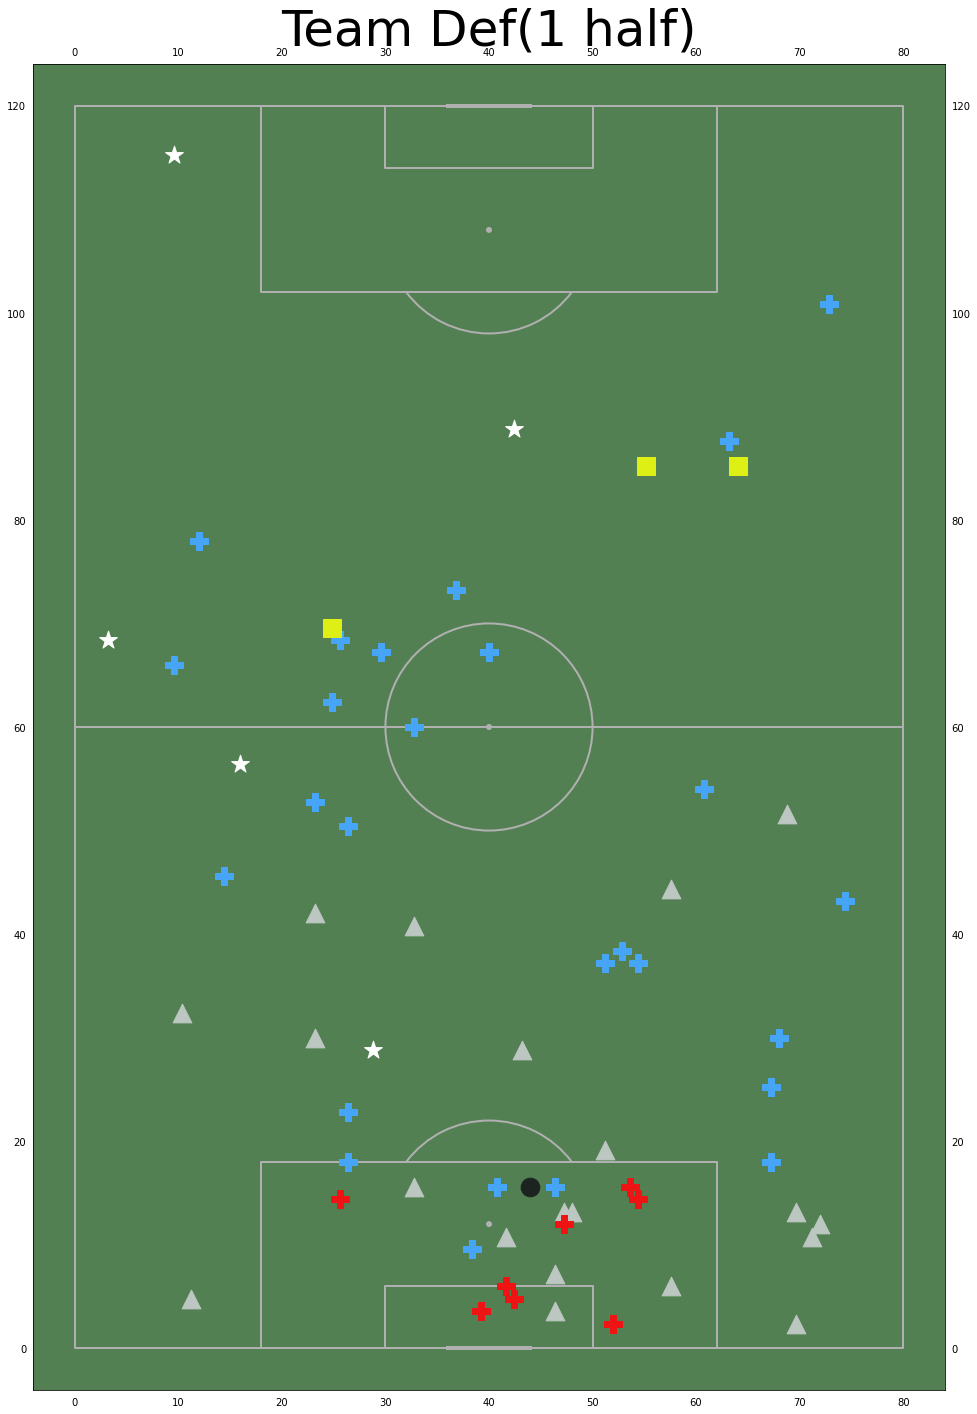

In [30]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
# plt.scatter(dataDef['Y'],dataDef['X'],c='#C6FA7B',s = 200,marker = "^")

plt.scatter(dfClear['Y'],dfClear['X'],c='#BDC7C2',s = 350,marker = "^")

plt.scatter(dfItc['Y'],dfItc['X'],c='#47A5F7',s = 350,marker = "P")
plt.scatter(dfItc1['Y'],dfItc1['X'],c='#EF1414',s = 350,marker = "P")

plt.scatter(dfBlk['Y'],dfBlk['X'],c='#1D2420',s = 350)

plt.scatter(dfYellow['Y'],dfYellow['X'],c='#DDEF14',s = 350,marker = "s")

plt.scatter(dfRed['Y'],dfRed['X'],c='#E10C0C',s = 350,marker = "s")

plt.scatter(dfLose['Y'],dfLose['X'],c='#FFFF33',s = 350,marker = "s")

plt.scatter(dfFoul['Y'],dfFoul['X'],c='#FFFFFF',s = 350,marker = "*")
if(seta == 0):
    title = fig.suptitle('Team Def(1 half)',fontsize = 50)
else:
    title = fig.suptitle('Team Def(2 half)',fontsize = 50)

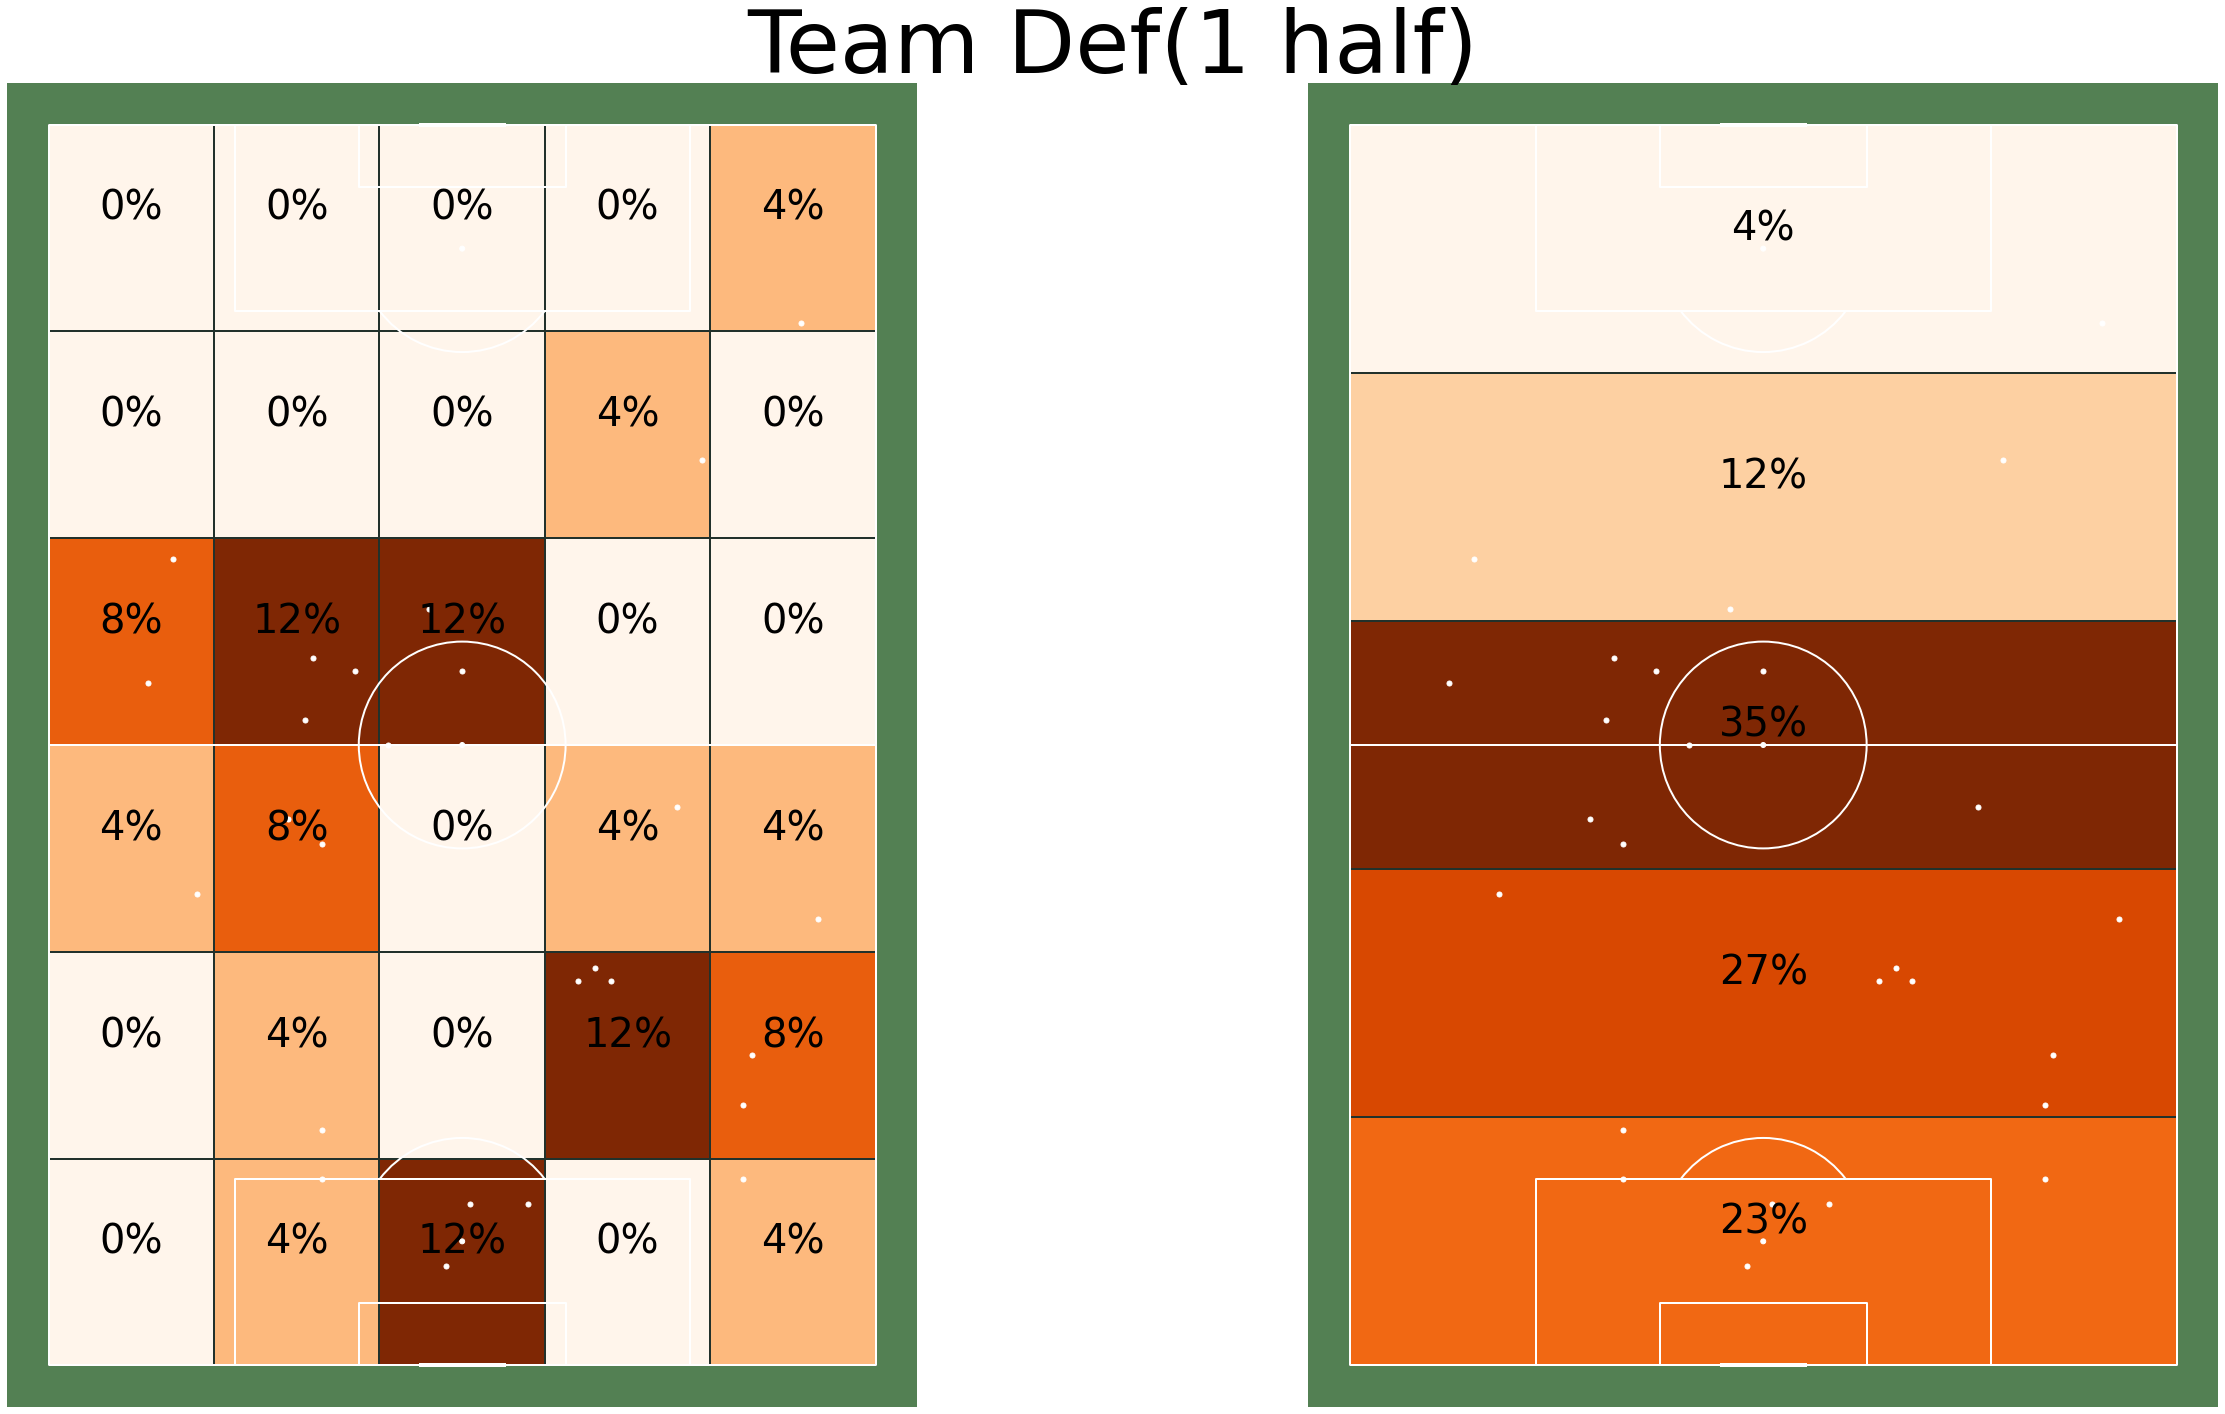

In [31]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=2,figsize =(40,20))

bins=[(6,5),(5,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dfItc ['X'],dfItc ['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dfItc ['X'],dfItc ['Y'],c='white',ax=ax[i],s=25)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Def(1 half)',fontsize = 88)
else:
    title = fig.suptitle('Team Def(2 half)',fontsize = 88)

In [32]:
seta = 1
if(seta==0):
    data = pd.read_csv('firsthalf.csv')
else:
    data = pd.read_csv('secoundhalf.csv')

In [33]:
data = data.replace("-",float(0))
data.Event.unique()
if(seta==0):
    data['X'] = data['X']*1.2
    data['Y'] = data['Y']*.8
    data['X2'] =data['X2']*1.2
    data['Y2'] = data['Y2']*.8
else:
    data['X'] = 120-data['X']*1.2
    data['Y'] = 80-data['Y']*.8
    data['X2'] = 120-data['X2']*1.2
    data['Y2'] = 80-data['Y2']*.8
if(seta==0):
    data15 = data[(data['Mins'] <= 15 ) ]
    data30 = data[(data['Mins'] <= 30) &(data['Mins'] > 15 ) ]
    data45 = data[(data['Mins'] <= 45 ) &(data['Mins'] > 30 )]
else:
    data15 = data[(data['Mins'] <= 60) &(data['Mins'] > 45 ) ]
    data30 = data[(data['Mins'] <= 75) &(data['Mins'] > 60 ) ]
    data45 = data[(data['Mins'] <= 90 ) &(data['Mins'] > 75 )]
dataShot = data[(data['Event'] == 'ShotOnTarget') |  (data['Event'] == 'ShotOffTarget') |
                         (data['Event'] == 'ShotGetGoal') | (data['Event'] == 'ShotBlock')]
dataShot= dataShot.reset_index()

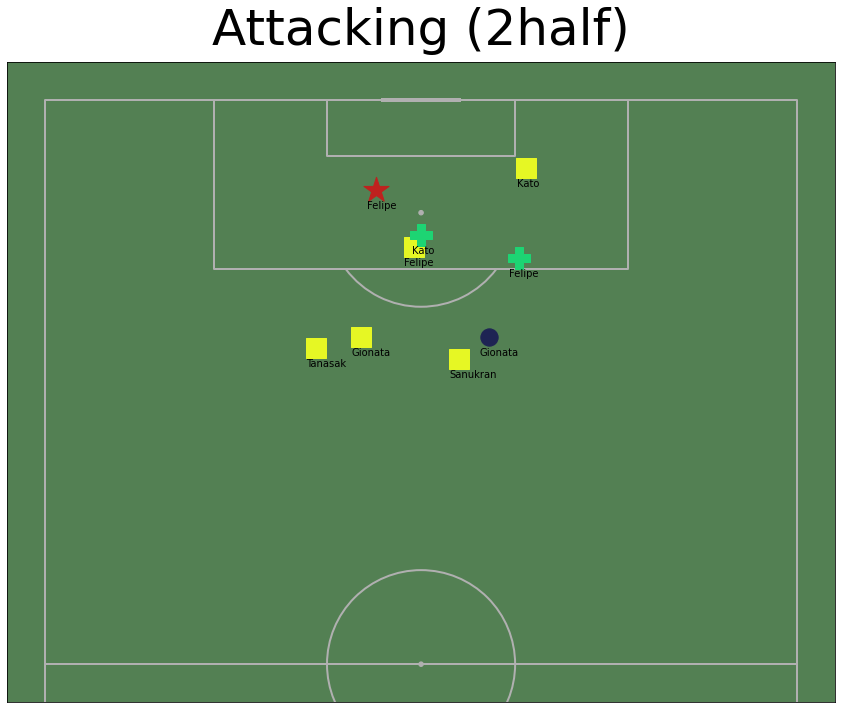

In [55]:
shX = dataShot['X']
shY = dataShot['Y']
shName = dataShot['Player']
shsty = dataShot['Event']

sout = dataShot[dataShot['Event'] == 'ShotOffTarget' ]
sot =  dataShot[dataShot['Event'] == 'ShotOnTarget' ]
sb =  dataShot[dataShot['Event'] == 'ShotBlock']
sgg =  dataShot[dataShot['Event'] == 'ShotGetGoal']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=True)
fig,ax =pitch.draw(figsize =(20,10))
    
#plt.scatter(dataShot['Y'],dataShot['X'],c='#BE2653',s = 700,marker = "*")
plt.scatter(sout['Y'],sout['X'],c='#E6F724',s = 400,marker = "s")
plt.scatter(sot['Y'],sot['X'],c='#1E2453',s = 300,marker = "o")
plt.scatter(sb['Y'],sb['X'],c='#1DD473',s = 500,marker = "P")
plt.scatter(sgg['Y'],sgg['X'],c='#BF211E',s = 700,marker = "*")

for i in range(len(dataShot['X'])):
    plt.text(shY[i]-1,shX[i]-2,shName[i])
title = fig.suptitle('Attacking (2half)',fontsize = 50)

In [35]:
dataPass = data[(data['Event'] == 'Pass') |  (data['Event'] == 'go') |
                         (data['Event'] == 'Passfail') | (data['Event'] == 'Cross')|  (data['Event'] == 'Assist')]
dataPass15 = data15[(data15['Event'] == 'Pass') |  (data15['Event'] == 'go') |
                         (data15['Event'] == 'Passfail') | (data15['Event'] == 'Cross')|  (data15['Event'] == 'Assist')]
dataPass30 = data30[(data30['Event'] == 'Pass') |  (data30['Event'] == 'go') |
                         (data30['Event'] == 'Passfail') | (data30['Event'] == 'Cross')|  (data30['Event'] == 'Assist')]
dataPass45 = data45[(data45['Event'] == 'Pass') |  (data45['Event'] == 'go') |
                         (data45['Event'] == 'Passfail') | (data45['Event'] == 'Cross')|  (data45['Event'] == 'Assist')]
dataPass = dataPass.reset_index()
dataPass15 = dataPass15.reset_index()
dataPass30 = dataPass30.reset_index()
dataPass45 = dataPass45.reset_index()

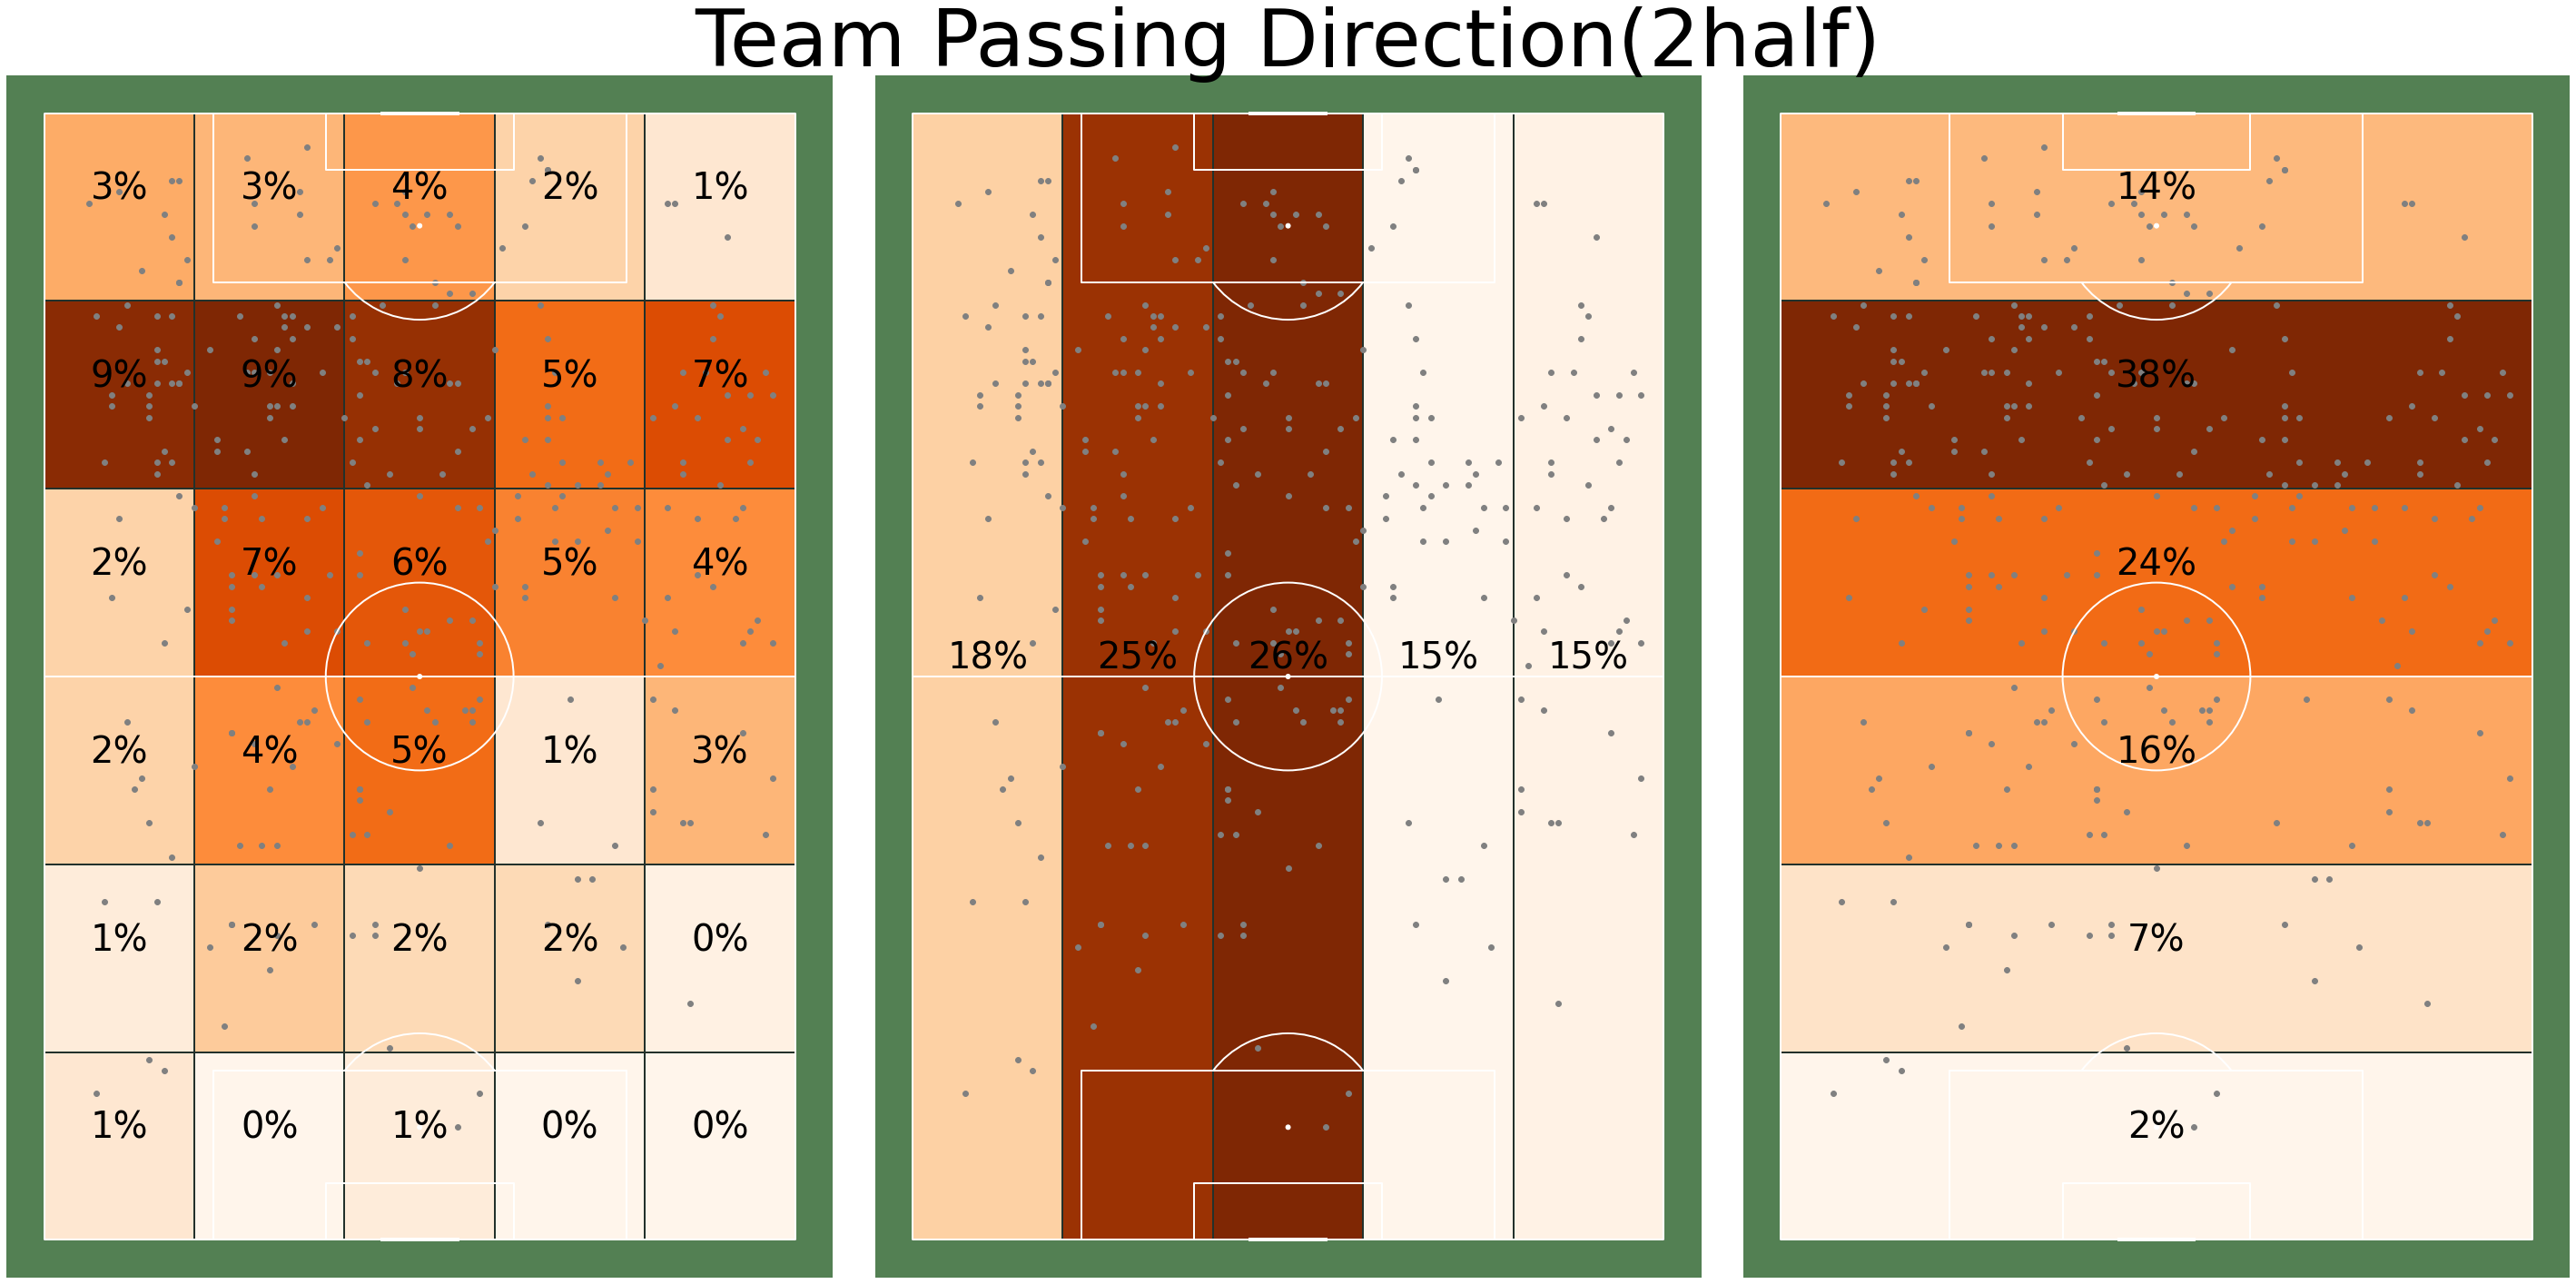

In [36]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass['X2'],dataPass['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass['X2'],dataPass['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(1half)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(2half)',fontsize = 88)


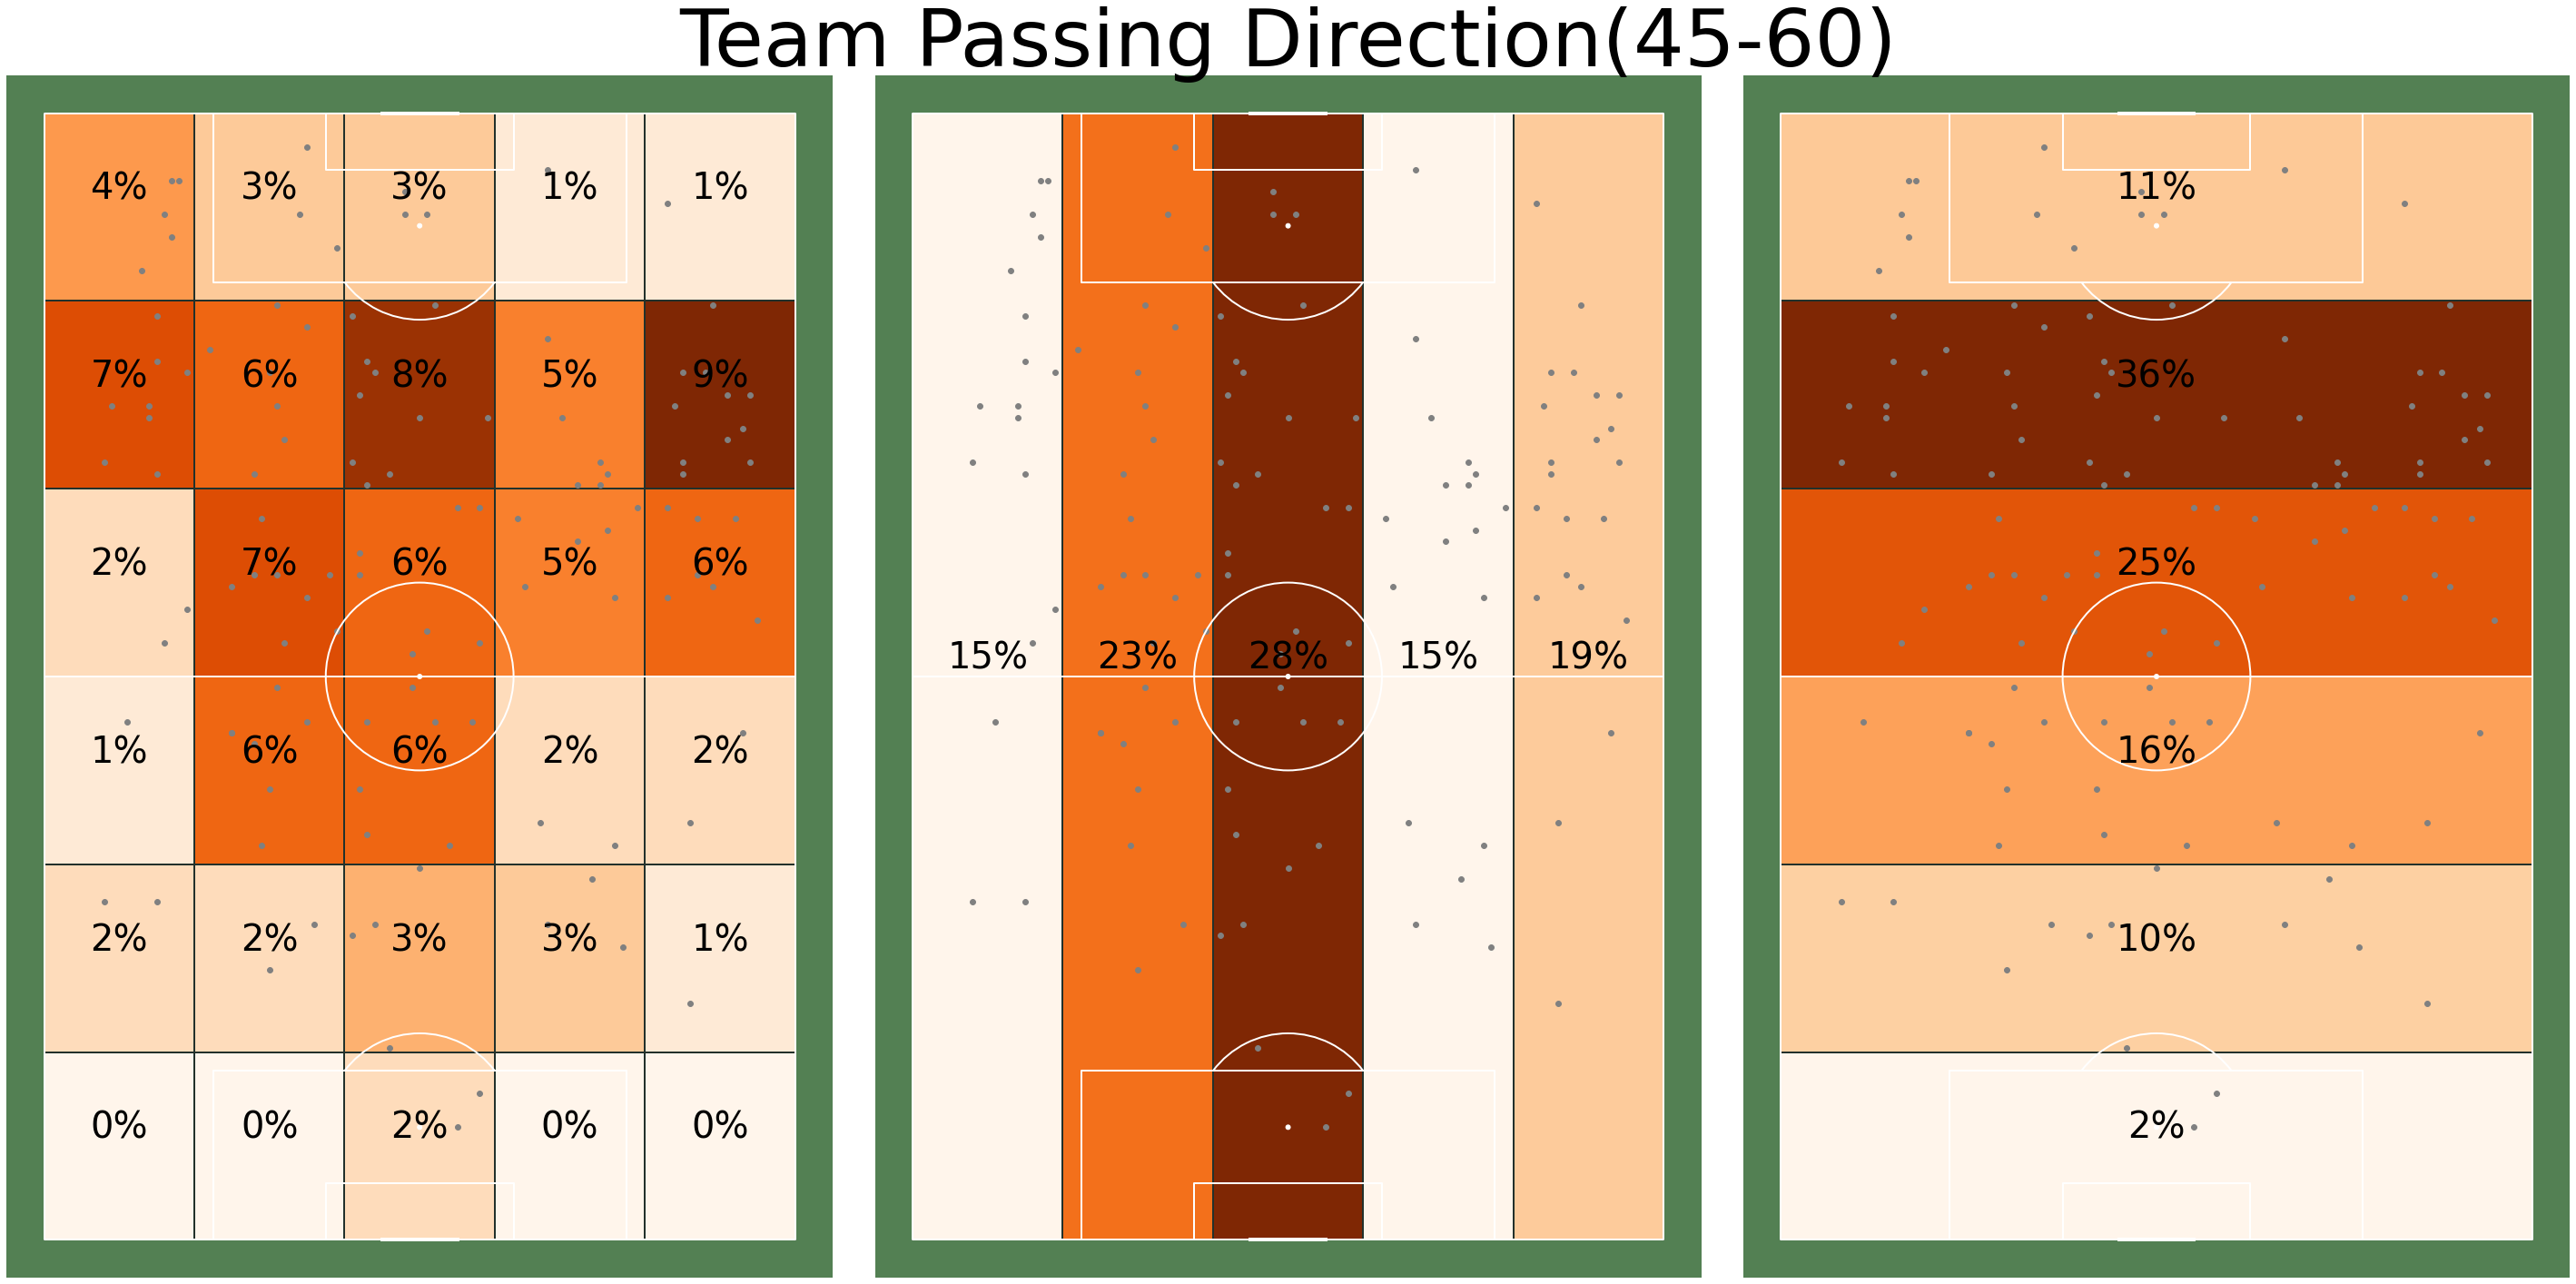

In [37]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass15['X2'],dataPass15['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass15['X2'],dataPass15['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(0-15)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(45-60)',fontsize = 88)

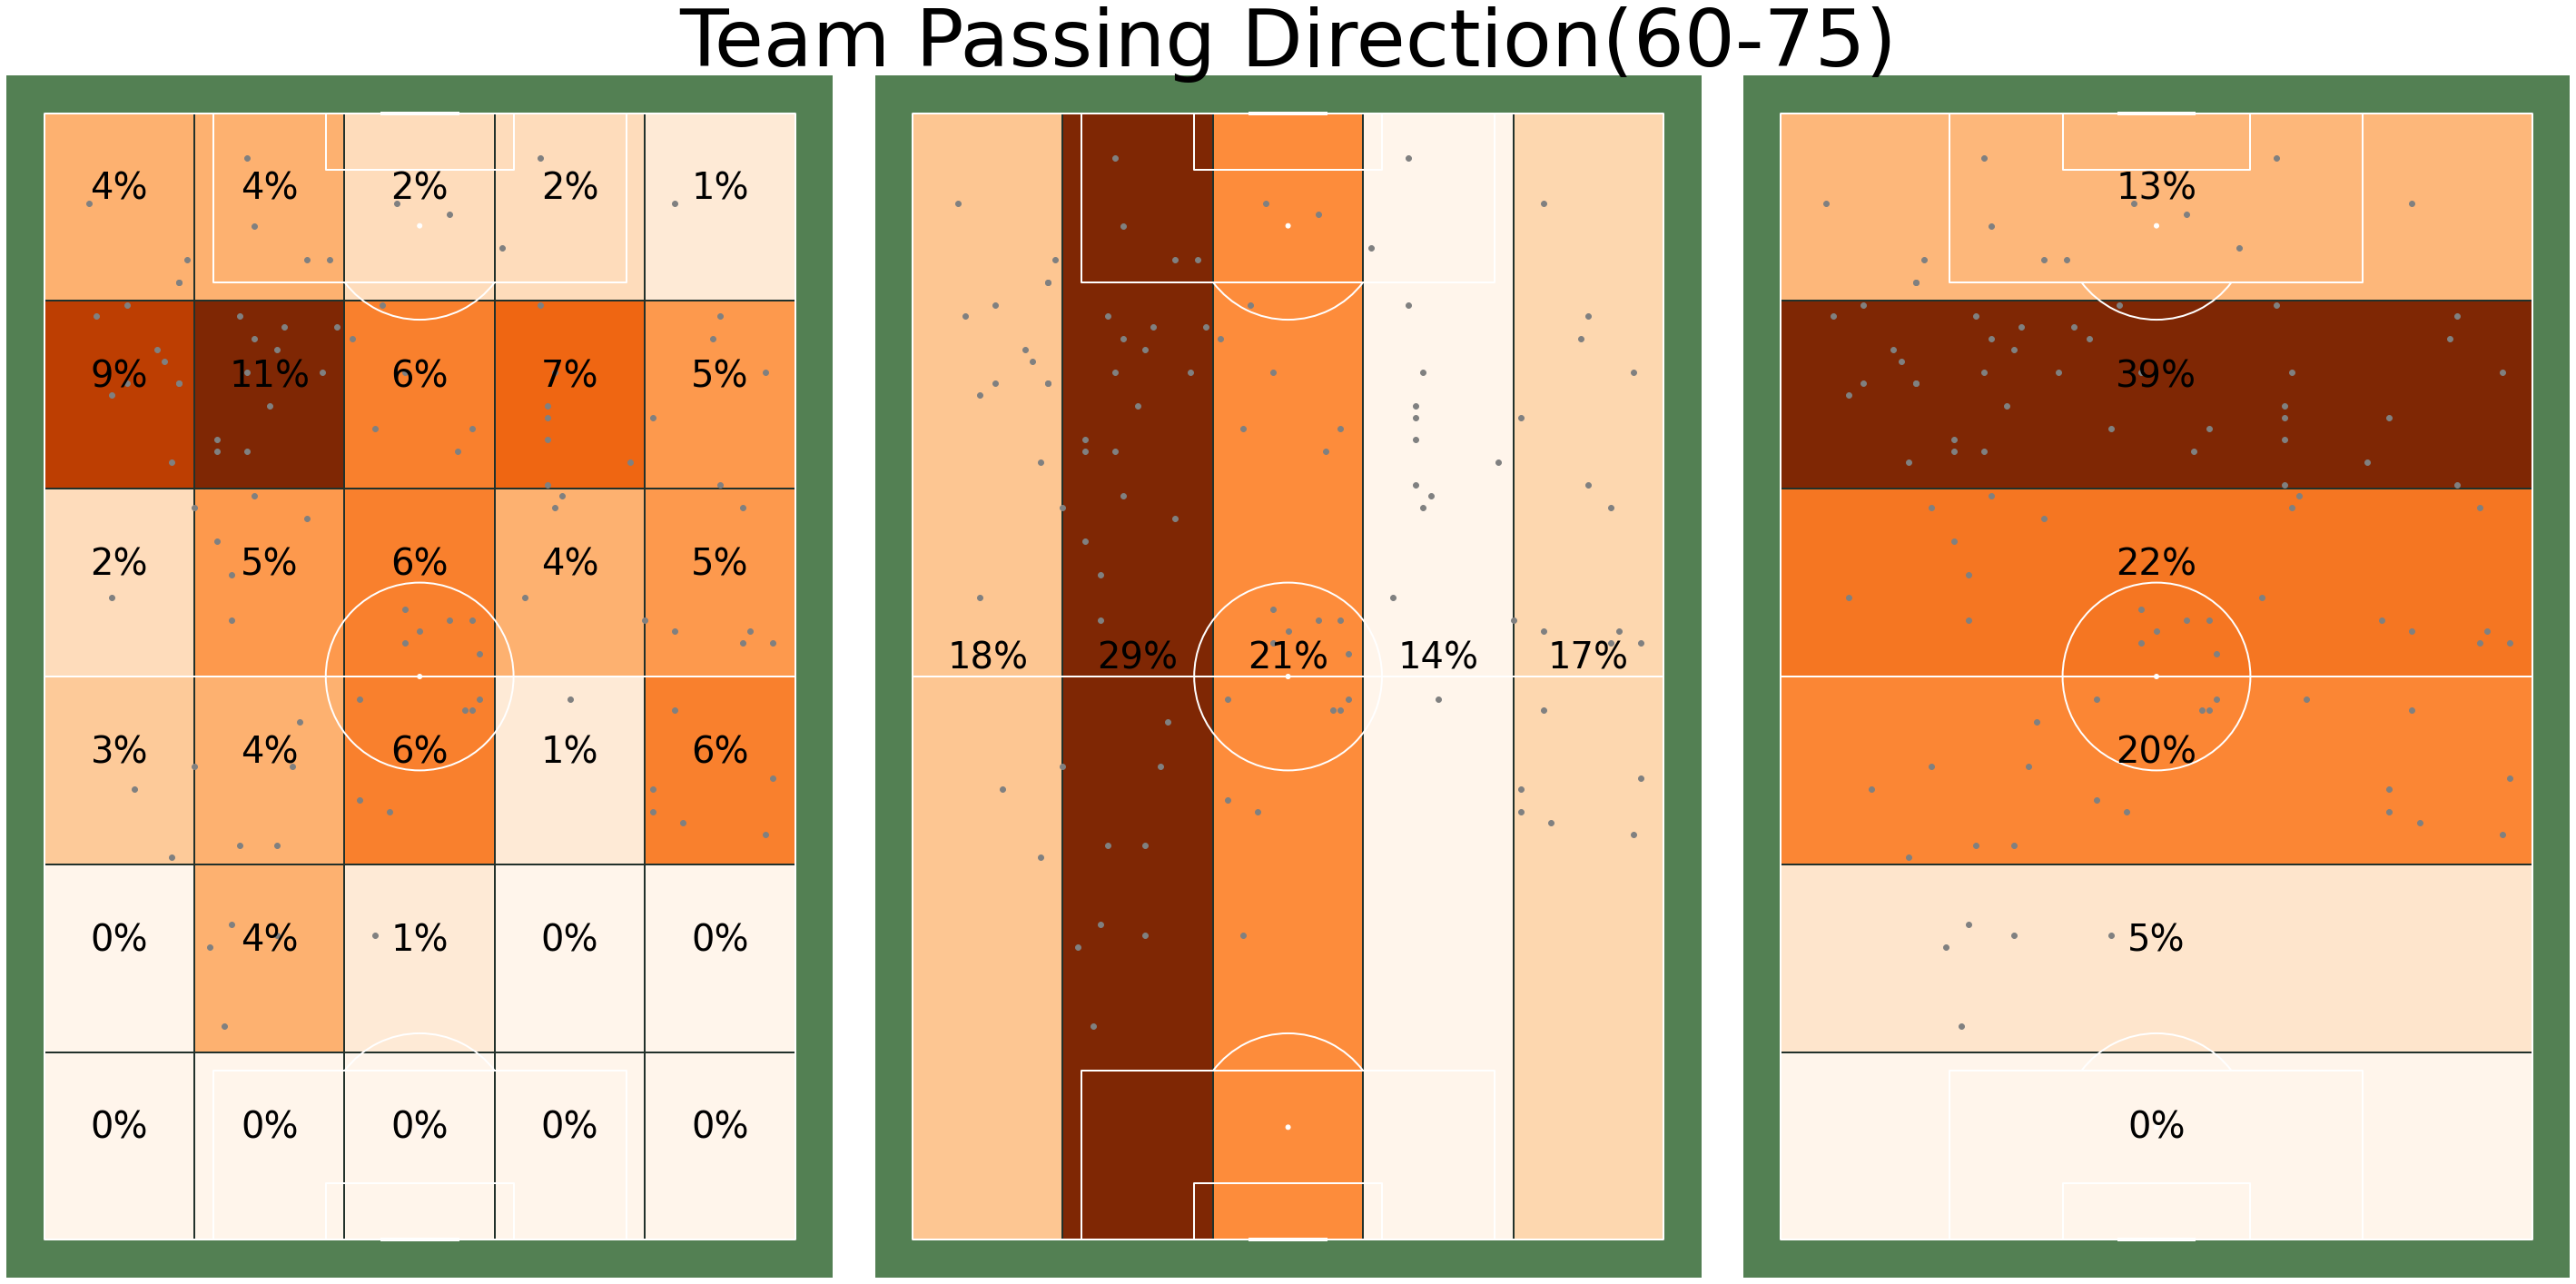

In [38]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass30['X2'],dataPass30['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass30['X2'],dataPass30['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(15-30)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(60-75)',fontsize = 88)

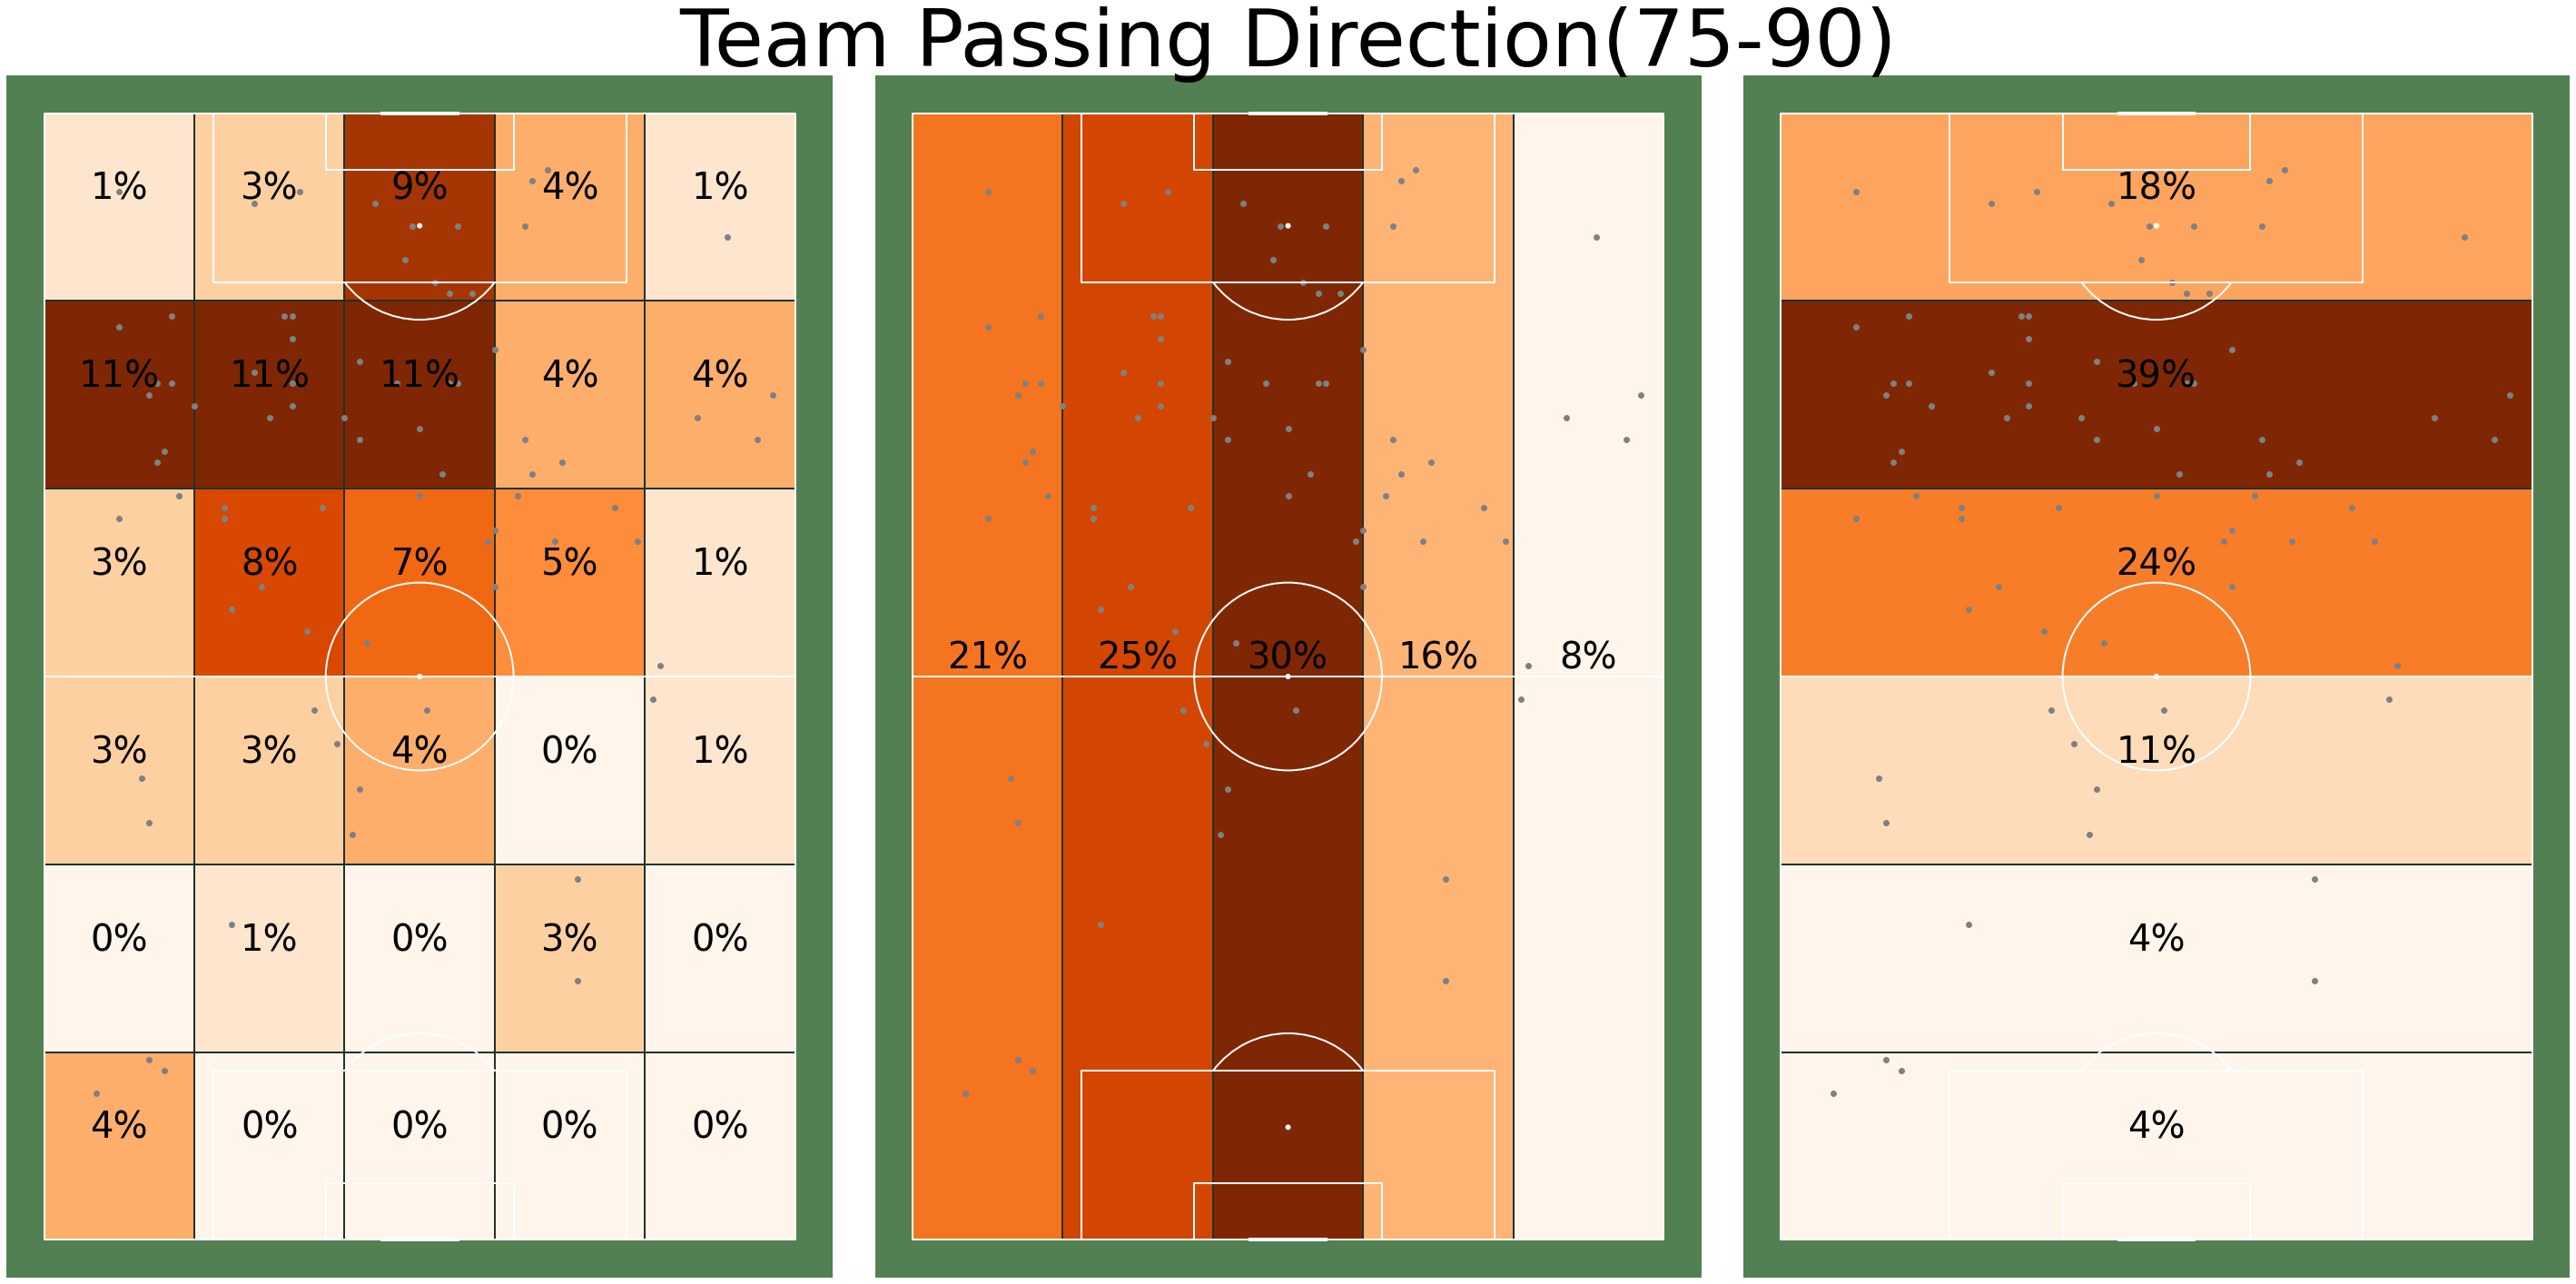

In [39]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dataPass45['X2'],dataPass45['Y2'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dataPass45['X2'],dataPass45['Y2'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(30-45)',fontsize = 88)
else:
    title = fig.suptitle('Team Passing Direction(75-90)',fontsize = 88)

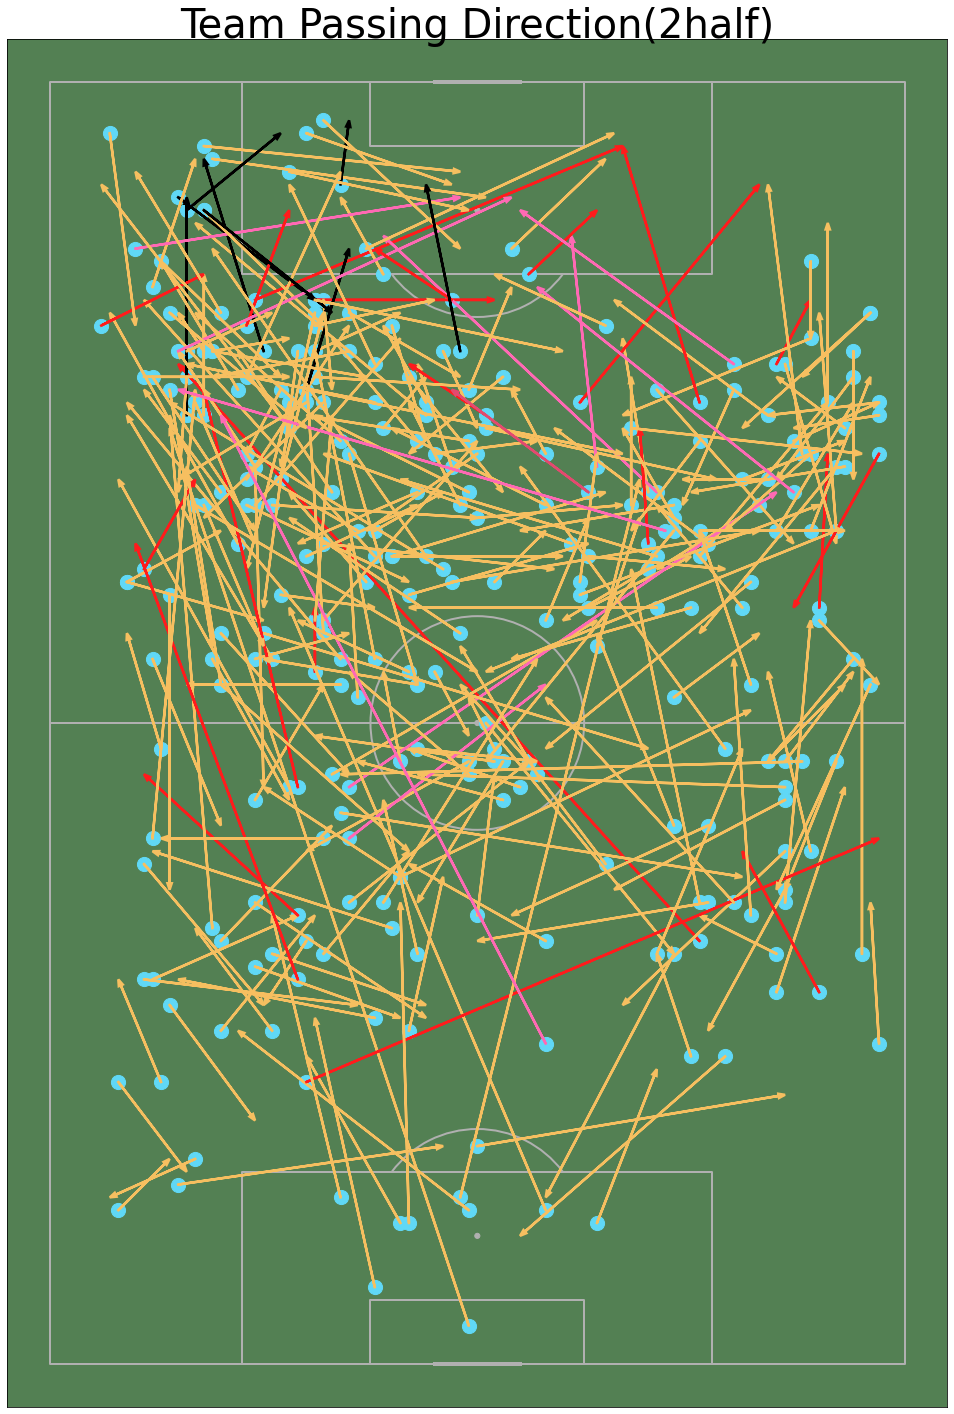

In [40]:

pDrtxH = dataPass['X']
pDrtyH = dataPass['Y']
pDesxH = dataPass['X2']
pDesyH = dataPass['Y2']
pStyH = dataPass['Event']

B = 0
F = 0
f = 0
for j in range(len(pStyH)):
    if(pDrtxH[j] > pDesxH[j]):
        B+= 1
    if(pDrtxH[j] < pDesxH[j]):
        F += 1
for j in range(len(pStyH)):
    if(pStyH[j] == 'Passfail'):
        f +=1
        
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')       
    
plt.scatter(dataPass['Y'],dataPass['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(1half)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(2half)',fontsize =40)

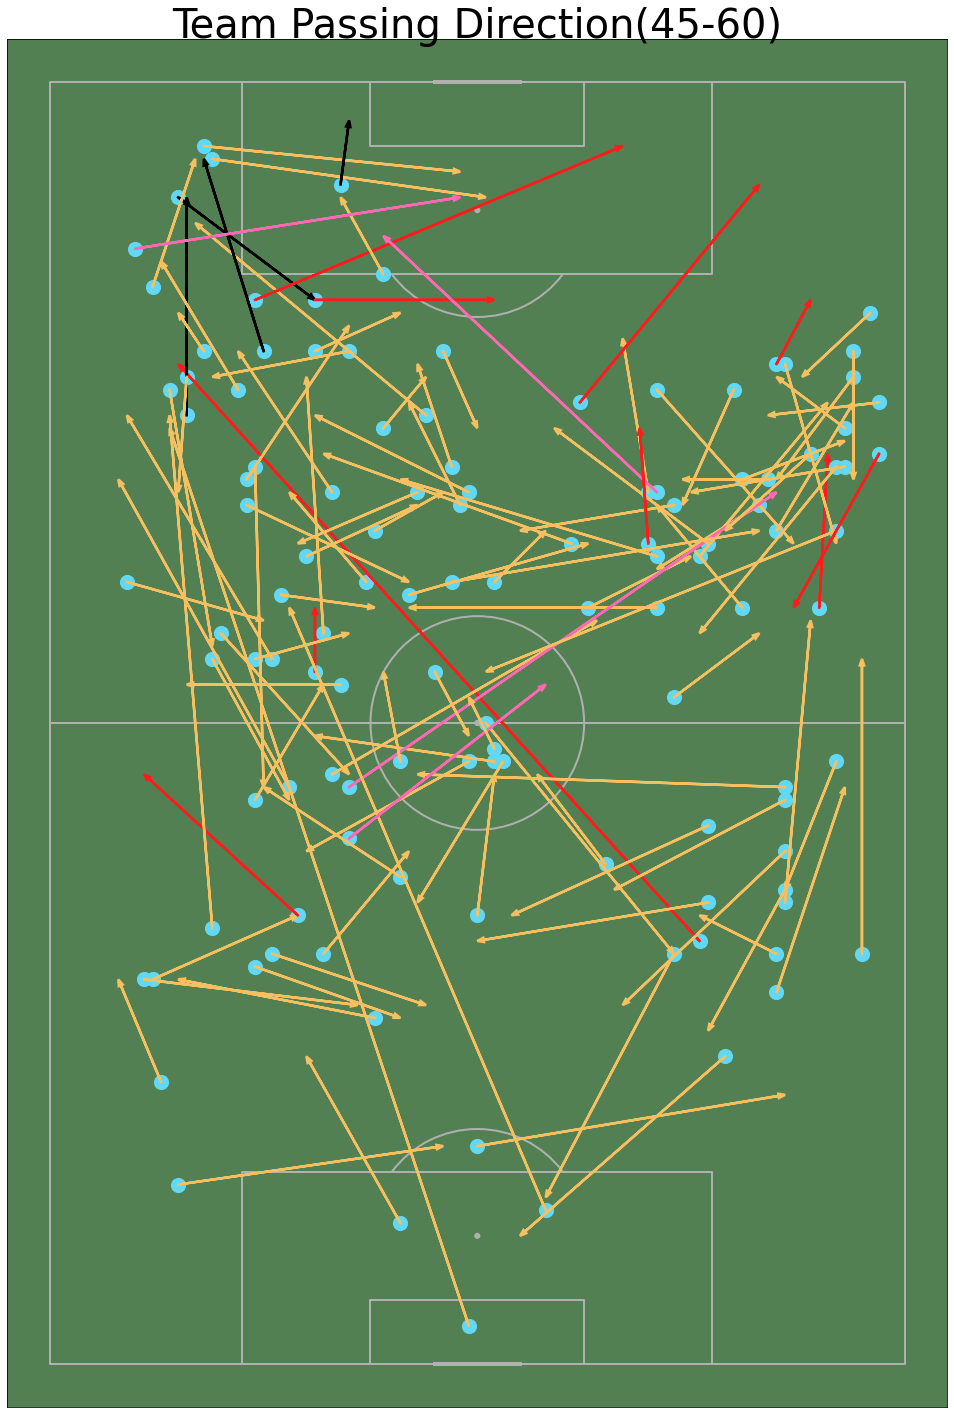

In [41]:
pDrtxH = dataPass15['X']
pDrtyH = dataPass15['Y']
pDesxH = dataPass15['X2']
pDesyH = dataPass15['Y2']
pStyH = dataPass15['Event']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')       
    
plt.scatter(dataPass15['Y'],dataPass15['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(0-15)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(45-60)',fontsize =40)

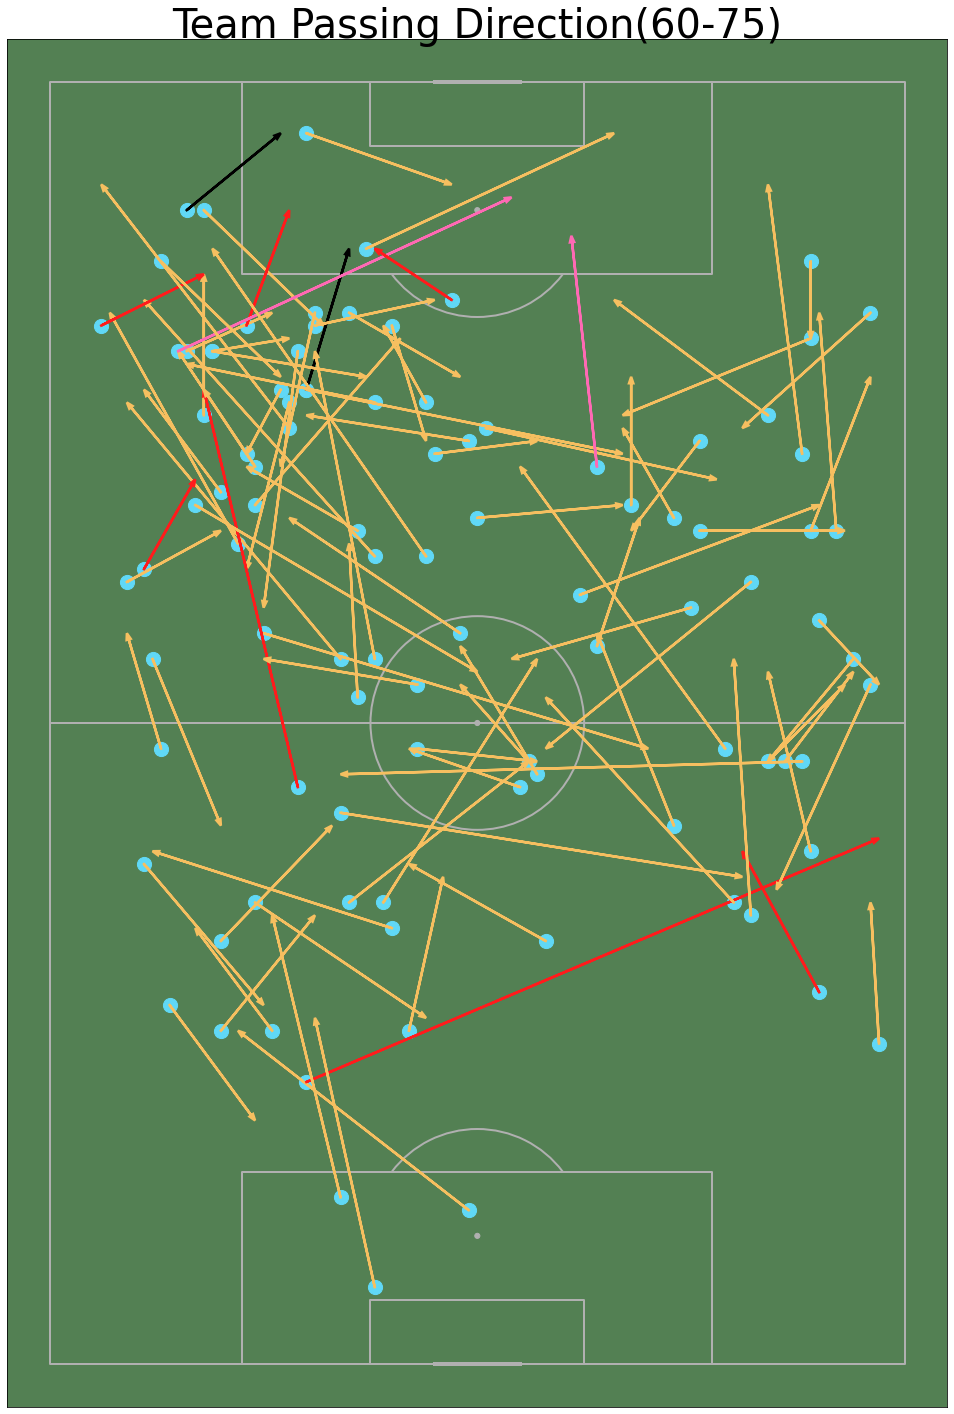

In [42]:
pDrtxH = dataPass30['X']
pDrtyH = dataPass30['Y']
pDesxH = dataPass30['X2']
pDesyH = dataPass30['Y2']
pStyH = dataPass30['Event']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')          
    
plt.scatter(dataPass30['Y'],dataPass30['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(15-30)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(60-75)',fontsize =40)

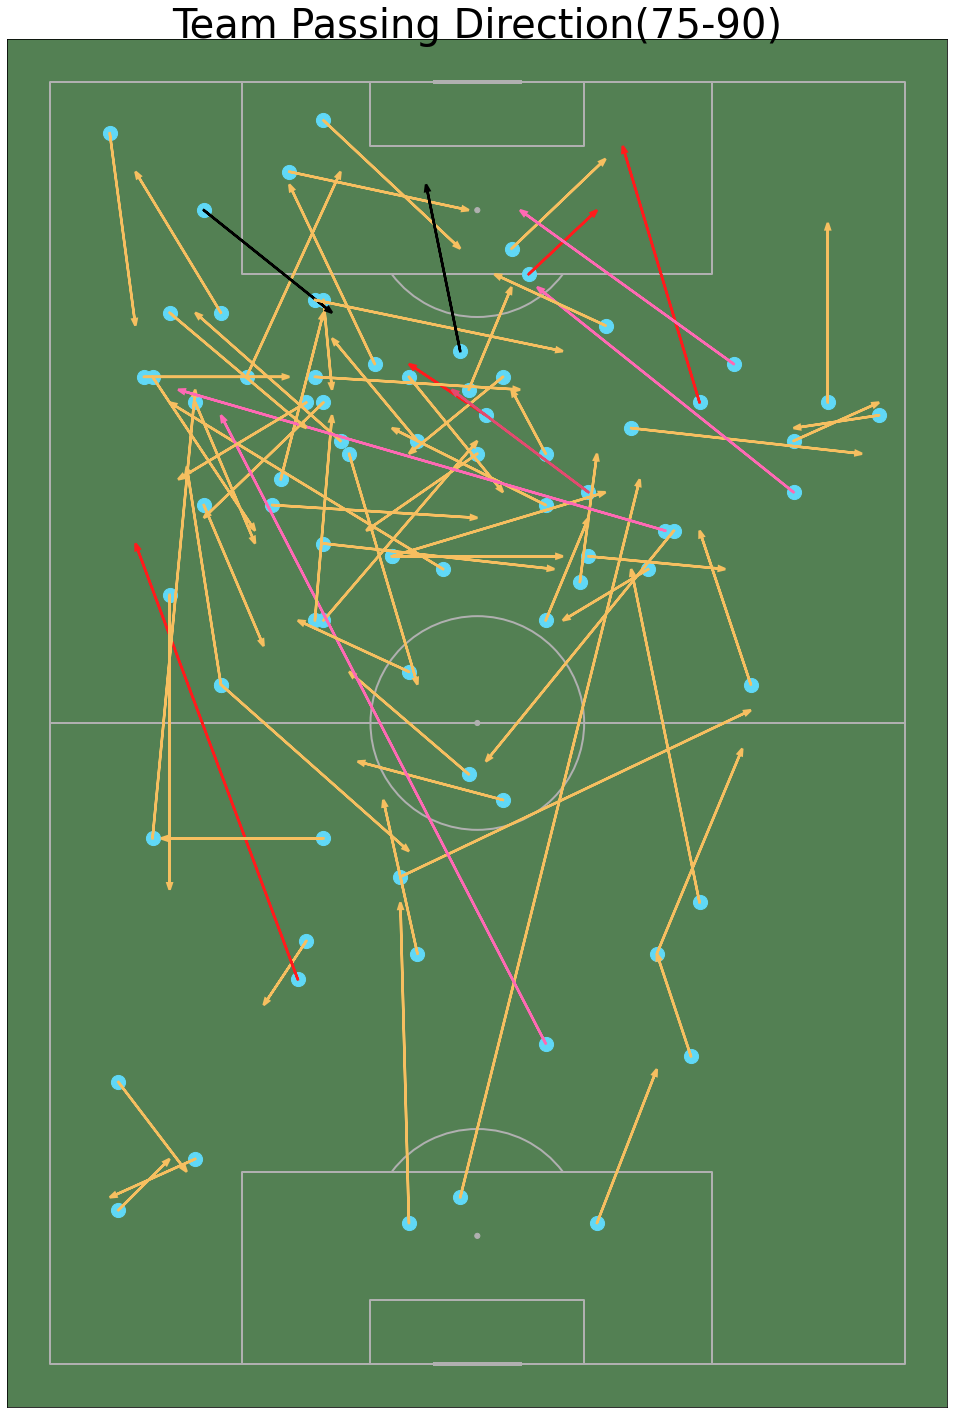

In [43]:
pDrtxH = dataPass45['X']
pDrtyH = dataPass45['Y']
pDesxH = dataPass45['X2']
pDesyH = dataPass45['Y2']
pStyH = dataPass45['Event']

pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))

for i in range(len(pStyH)):
    if(pStyH[i] == 'Assist'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#E34A6F',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'go'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Passfail'):
          plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#ff1b1c',linewidth =2.5,head_width = 0.4 ,
                  length_includes_head = 'True')         
    
plt.scatter(dataPass45['Y'],dataPass45['X'],c='#60D8F6',s = 200 ,marker = 'o')
if(seta == 0):
    title = fig.suptitle('Team Passing Direction(30-45)',fontsize =40)
else:
    title = fig.suptitle('Team Passing Direction(75-90)',fontsize =40)

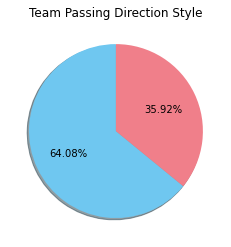

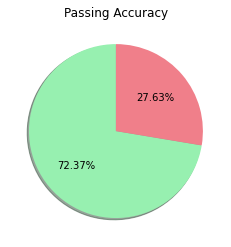

In [44]:
z = F,B
colors = ( "#6FC7F0" ,"#F07F8A")
plt.title("Team Passing Direction Style")
plt.pie(z ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors)
plt.show()
k = len(pStyH)-f,f
colors = ( "#97F0B0","#F07F8A")
plt.title("Passing Accuracy")
plt.pie(k ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors)
plt.show()

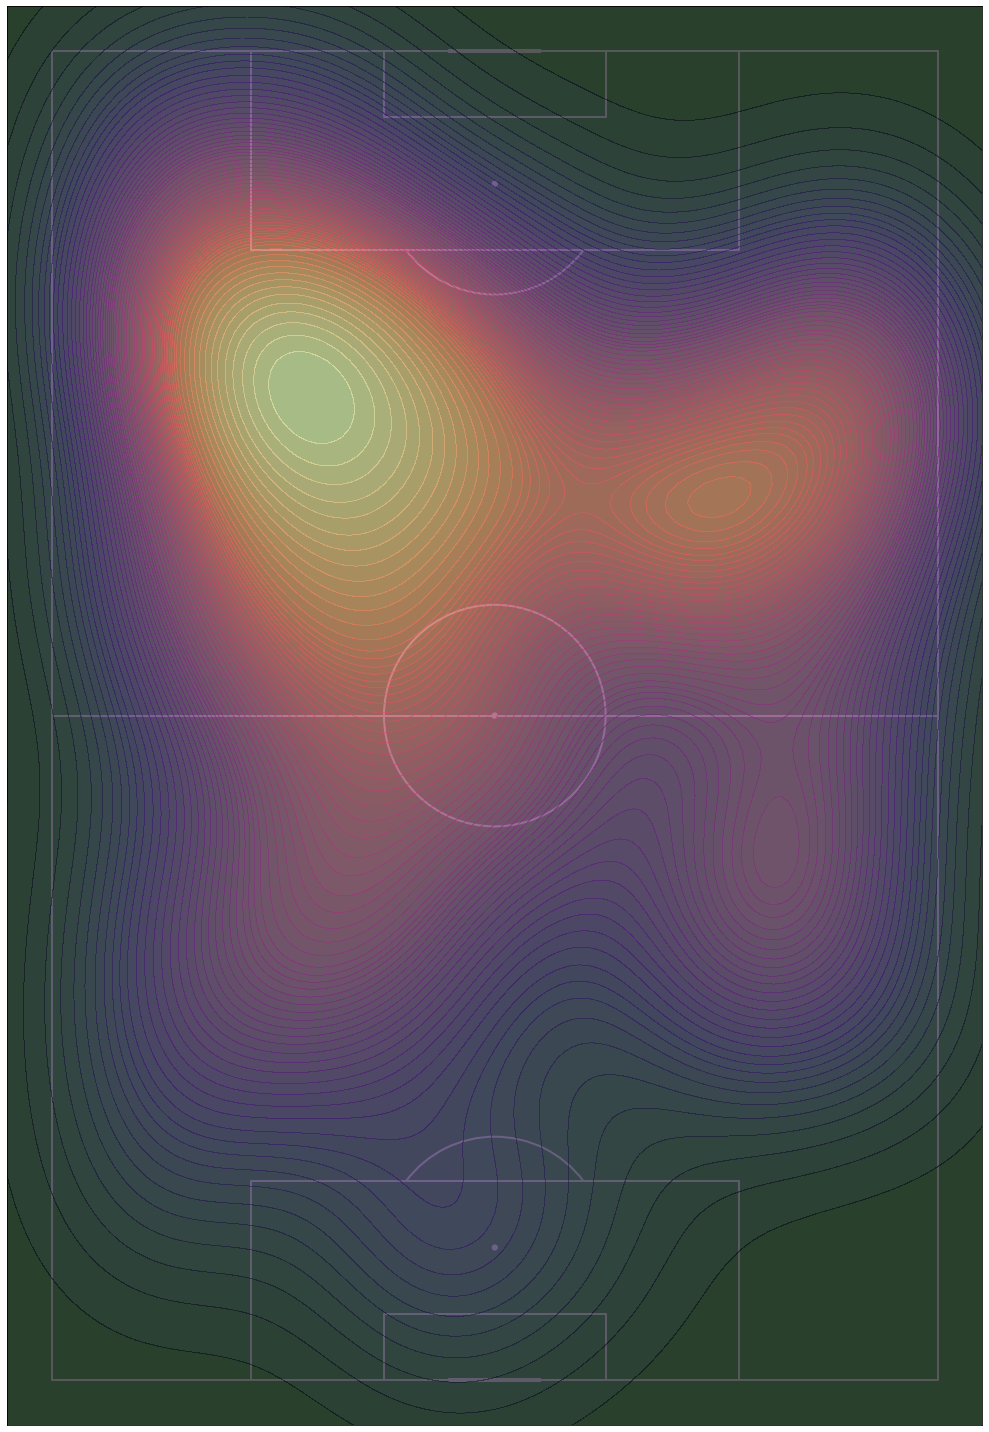

In [56]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True,pitch_color = '#538053')
fig,ax =pitch.draw(figsize =(40,20))
#plt.scatter(dataPass['Y'],dataPass['X'],c='#60D8F6',s = 200 ,marker = 'o')
kde = sns.kdeplot(x = dataPass['Y'], y = dataPass['X'],
                  shade = True,shade_lowest=True,
                  alpha=.5,thresh=.4,n_levels=70,cmap = 'magma')

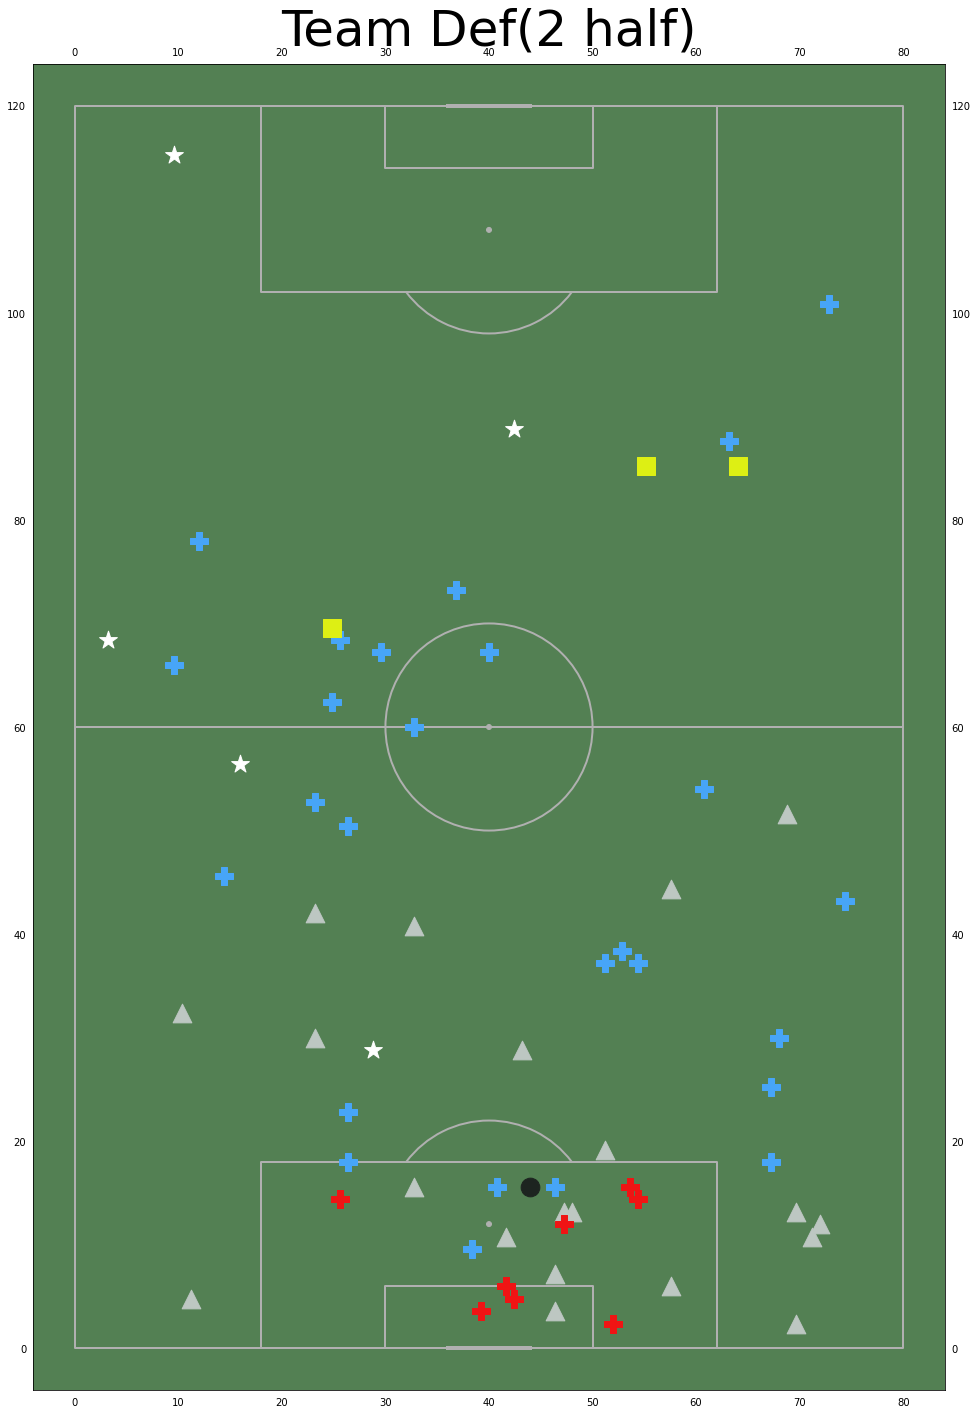

In [46]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
# plt.scatter(dataDef['Y'],dataDef['X'],c='#C6FA7B',s = 200,marker = "^")

plt.scatter(dfClear['Y'],dfClear['X'],c='#BDC7C2',s = 350,marker = "^")

plt.scatter(dfItc['Y'],dfItc['X'],c='#47A5F7',s = 350,marker = "P")
plt.scatter(dfItc1['Y'],dfItc1['X'],c='#EF1414',s = 350,marker = "P")

plt.scatter(dfBlk['Y'],dfBlk['X'],c='#1D2420',s = 350)

plt.scatter(dfYellow['Y'],dfYellow['X'],c='#DDEF14',s = 350,marker = "s")

plt.scatter(dfRed['Y'],dfRed['X'],c='#E10C0C',s = 350,marker = "s")

plt.scatter(dfLose['Y'],dfLose['X'],c='#FFFF33',s = 350,marker = "s")

plt.scatter(dfFoul['Y'],dfFoul['X'],c='#FFFFFF',s = 350,marker = "*")
if(seta == 0):
    title = fig.suptitle('Team Def(1 half)',fontsize = 50)
else:
    title = fig.suptitle('Team Def(2 half)',fontsize = 50)

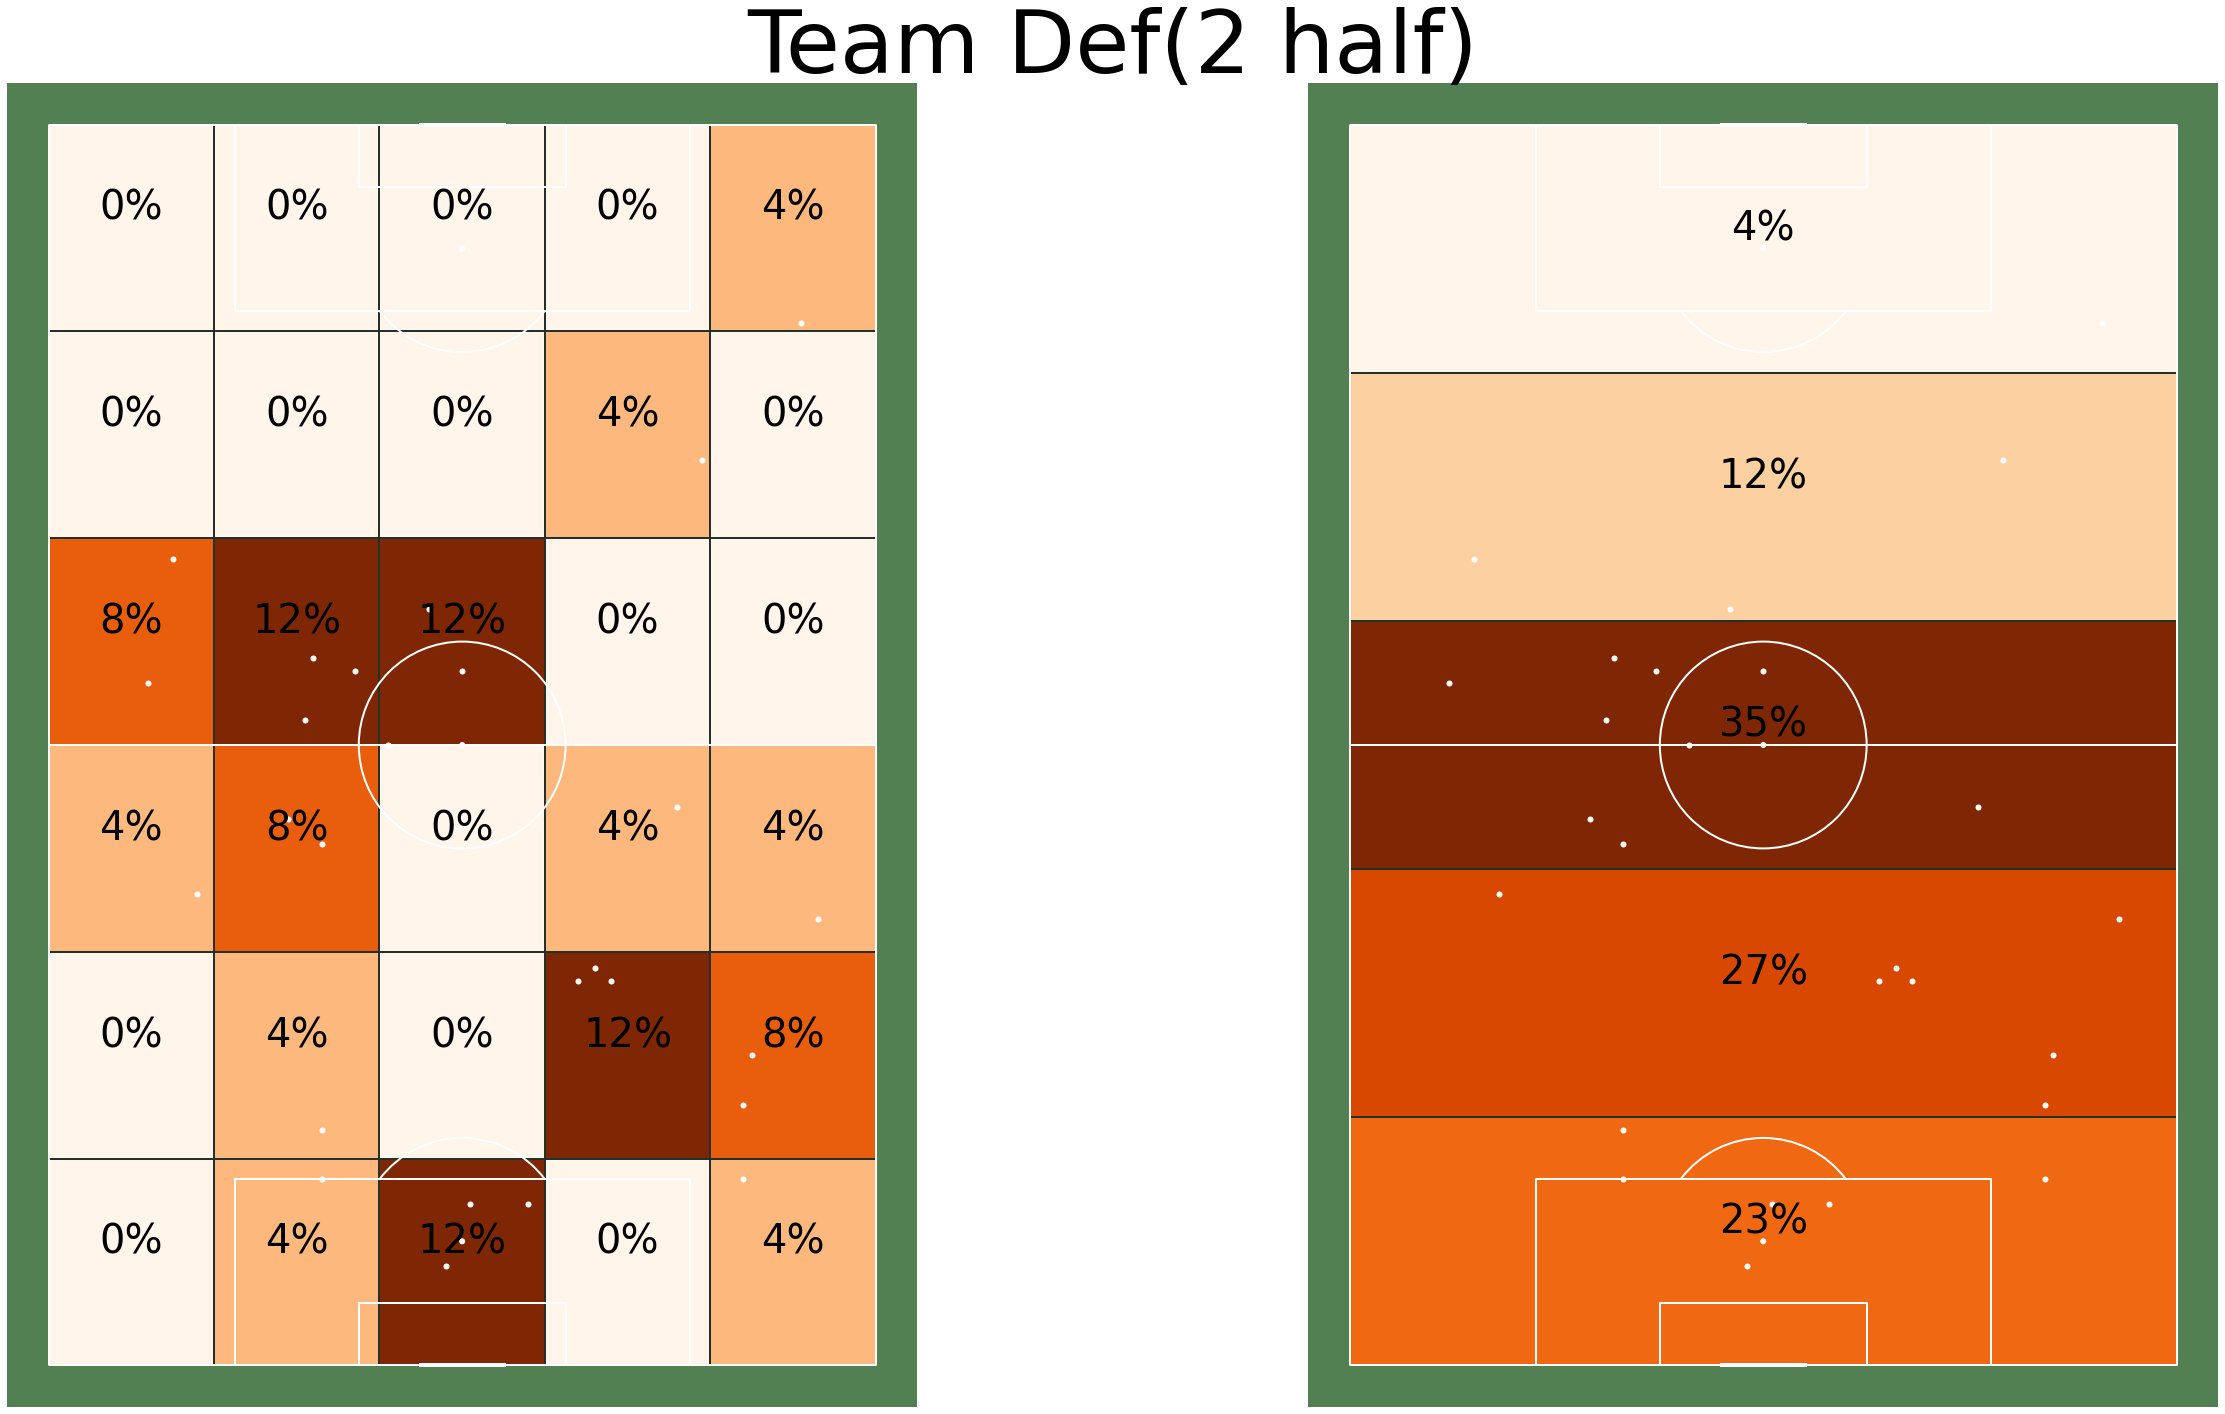

In [47]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=2,figsize =(40,20))

bins=[(6,5),(5,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic(dfItc ['X'],dfItc ['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter(dfItc ['X'],dfItc ['Y'],c='white',ax=ax[i],s=25)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle('Team Def(1 half)',fontsize = 88)
else:
    title = fig.suptitle('Team Def(2 half)',fontsize = 88)